In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import warnings
from sklearn.decomposition import PCA
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#%run "C:\\Users\\jujor\\Documents\\pythonsheet\\Functions.ipynb"

In [72]:
import matplotlib.pyplot as plt

In [73]:
import pandas as pd
df = pd.read_csv('C:/Users/jujor/Documents/pythonsheet/ProyectoM7/Your Career Aspirations of GenZ.csv')

In [74]:
df.head()

Your Current Country.  Your Current Zip Code / Pin Code Your Gender  \
0                 India                            273005        Male   
1                 India                            851129        Male   
2                 India                            123106      Female   
3                 India                            834003        Male   
4                 India                            301019      Female   

  Which of the below factors influence the most about your career aspirations ?  \
0       People who have changed the world for better                              
1       People who have changed the world for better                              
2                         Social Media like LinkedIn                              
3      People from my circle, but not family members                              
4             Influencers who had successful careers                              

  Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.  \
0                       Yes, I will earn and do that                                                                         
1      No, But if someone could bare the cost I will                                                                         
2                       Yes, I will earn and do that                                                                         
3      No, But if someone could bare the cost I will                                                                         
4      No, But if someone could bare the cost I will                                                                         

  How likely is that you will work for one employer for 3 years or more ?  \
0  This will be hard to do, but if it is the righ...                        
1  This will be hard to do, but if it is the righ...                        
2                      Will work for 3 years or more                        
3  This will be hard to do, but if it is the righ...                        
4                      Will work for 3 years or more                        

  Would you work for a company whose mission is not clearly defined and publicly posted.  \
0                                                 No                                       
1                                                 No                                       
2                                                Yes                                       
3                                                 No                                       
4                                                 No                                       

  How likely would you work for a company whose mission is misaligned with their public actions or even their product ?  \
0                             Will NOT work for them                                                                      
1                             Will NOT work for them                                                                      
2                                 Will work for them                                                                      
3                             Will NOT work for them                                                                      
4                             Will NOT work for them                                                                      

   How likely would you work for a company whose mission is not bringing social impact ?  \
0                                                  4                                       
1                                                  1                                       
2                                                  7                                       
3                                                  6                                       
4                                                  5                                       


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

In [76]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       Your Current Zip Code / Pin Code  \
count                        235.000000   
mean                      492560.970213   
std                       213622.174893   
min                         1234.000000   
25%                       381012.500000   
50%                       524412.000000   
75%                       607253.000000   
max                       852218.000000   

       How likely would you work for a company whose mission is not bringing social impact ?  
count                                         235.000000                                      
mean                                            5.272340                                      
std                                             2.479463                                      
min                                             1.000000                                      
25%                                             3.000000                                      
50%           

In [77]:
print("\nCompletitud:")
completitud = (1 - df.isnull().mean()) * 100
print(completitud.round(2))


Completitud:
Your Current Country.                                                                                                       100.0
Your Current Zip Code / Pin Code                                                                                            100.0
Your Gender                                                                                                                 100.0
Which of the below factors influence the most about your career aspirations ?                                               100.0
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.    100.0
How likely is that you will work for one employer for 3 years or more ?                                                     100.0
Would you work for a company whose mission is not clearly defined and publicly posted.                                      100.0
How likely would you work for a company whose mission is misaligned with the

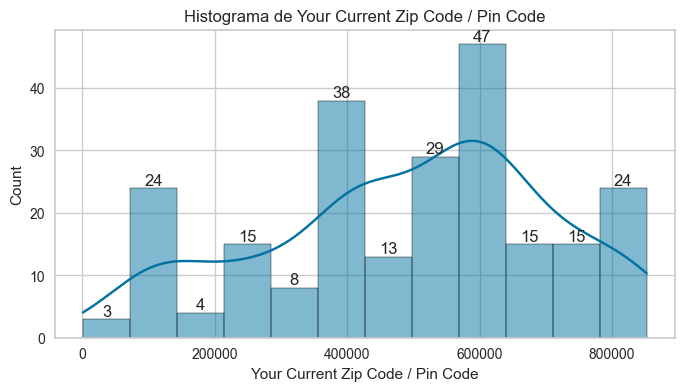

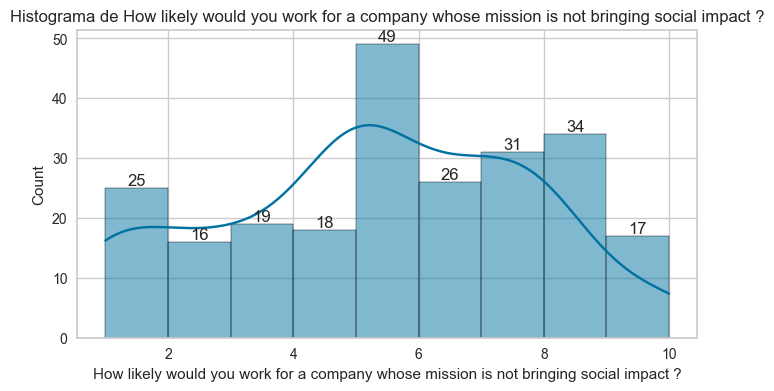

In [78]:
numericas = df.select_dtypes(include=['int64', 'float64', 'int32'])
for columna in numericas.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(data=df, x=columna, kde=True)
    plt.title(f'Histograma de {columna}')
    if len(ax.patches) < 25:  # Imprimir valores solo si hay menos de 25 barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

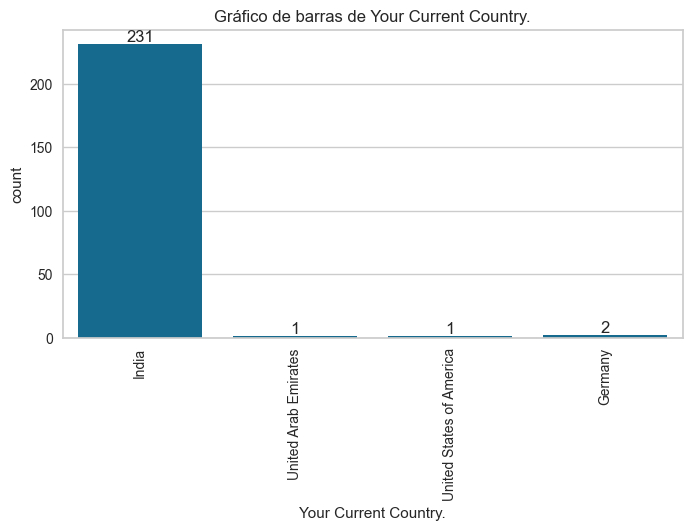

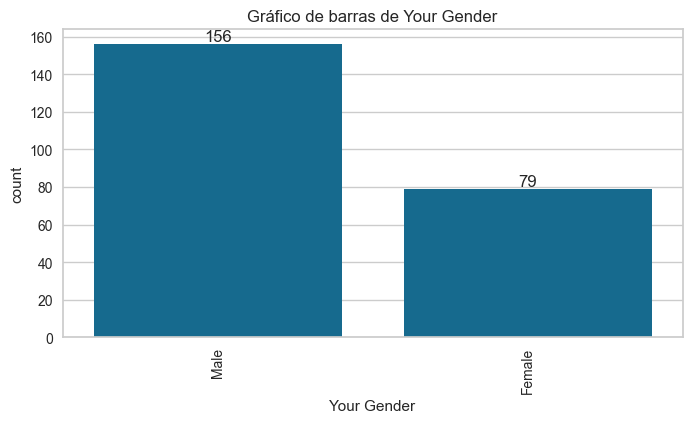

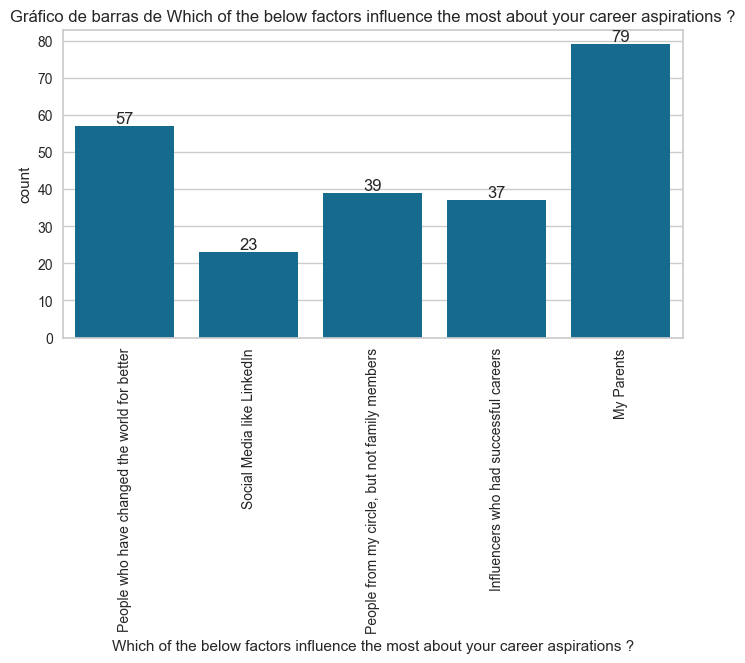

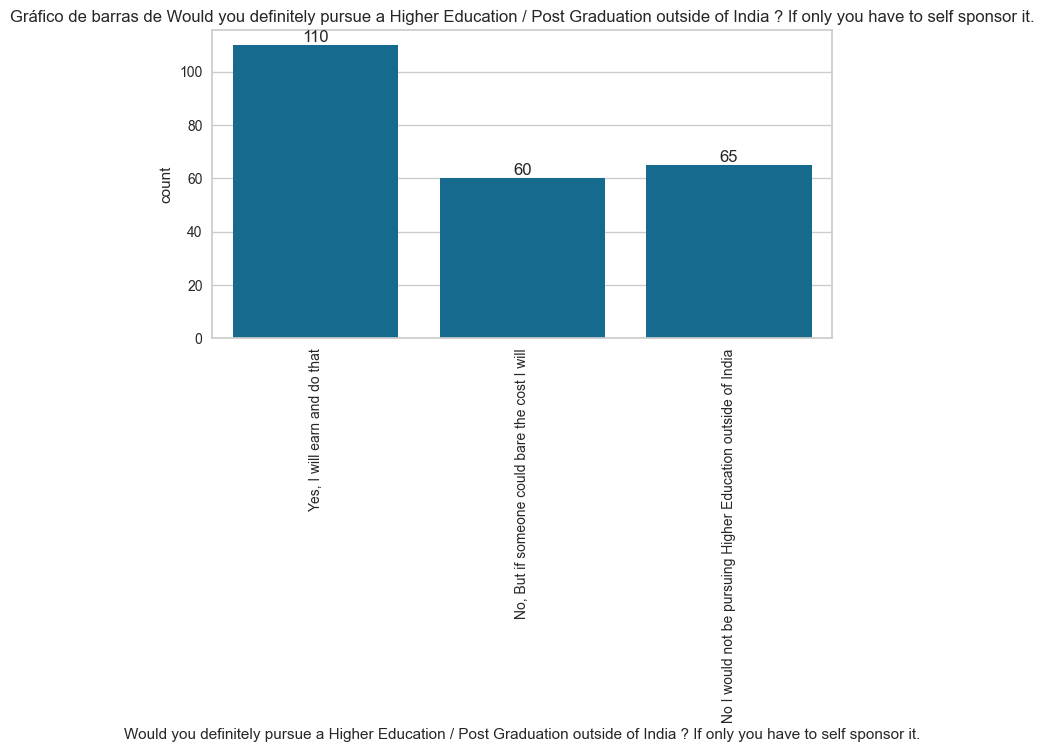

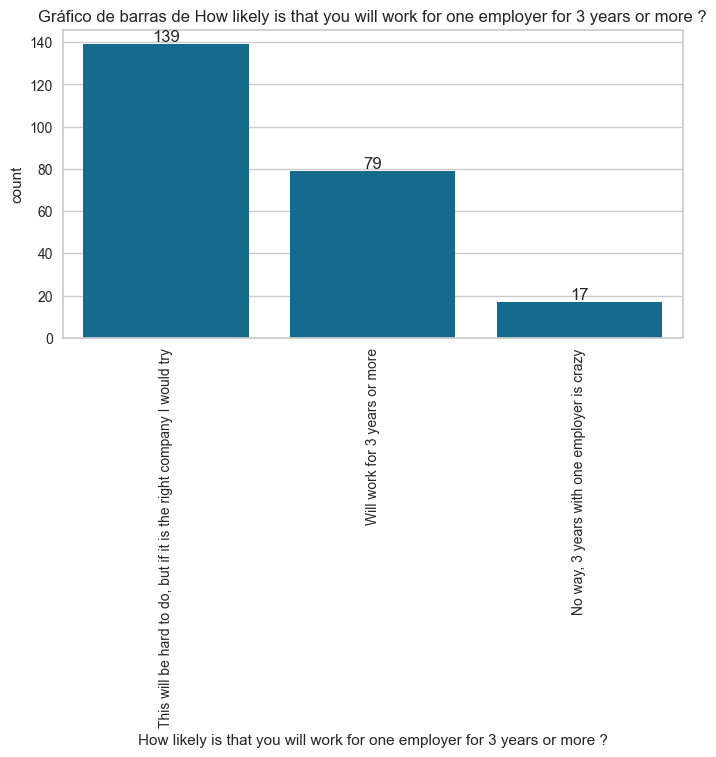

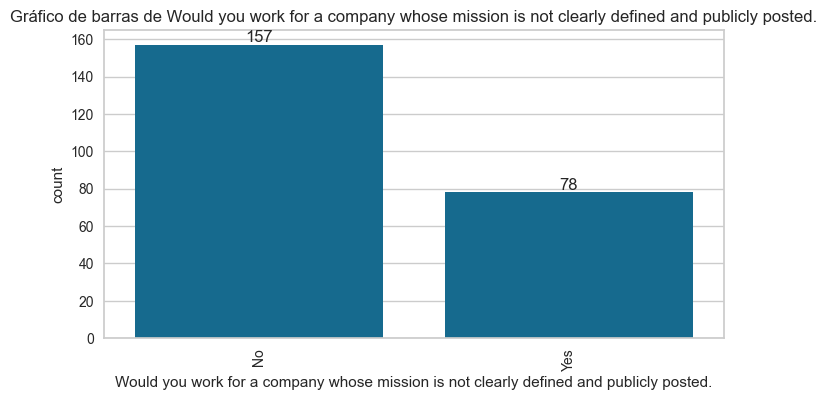

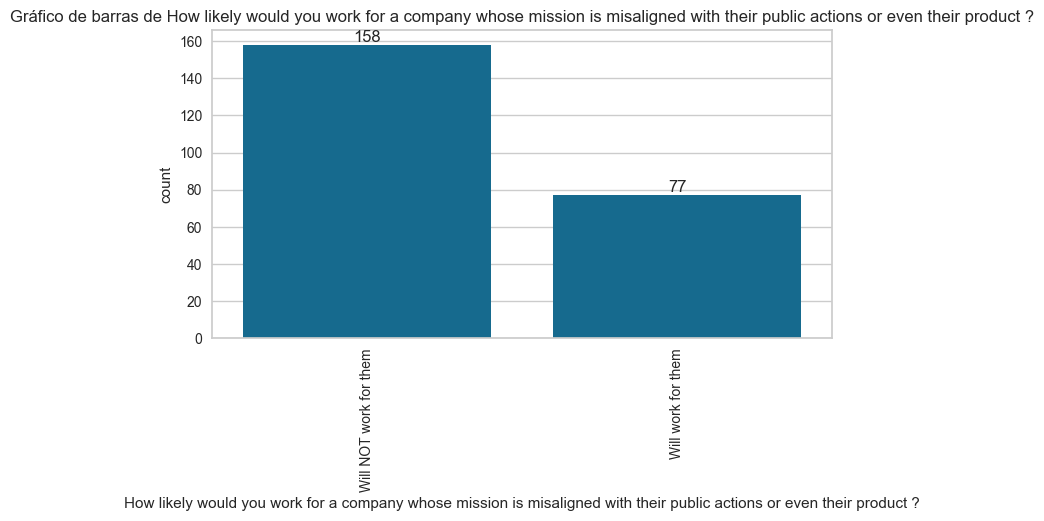

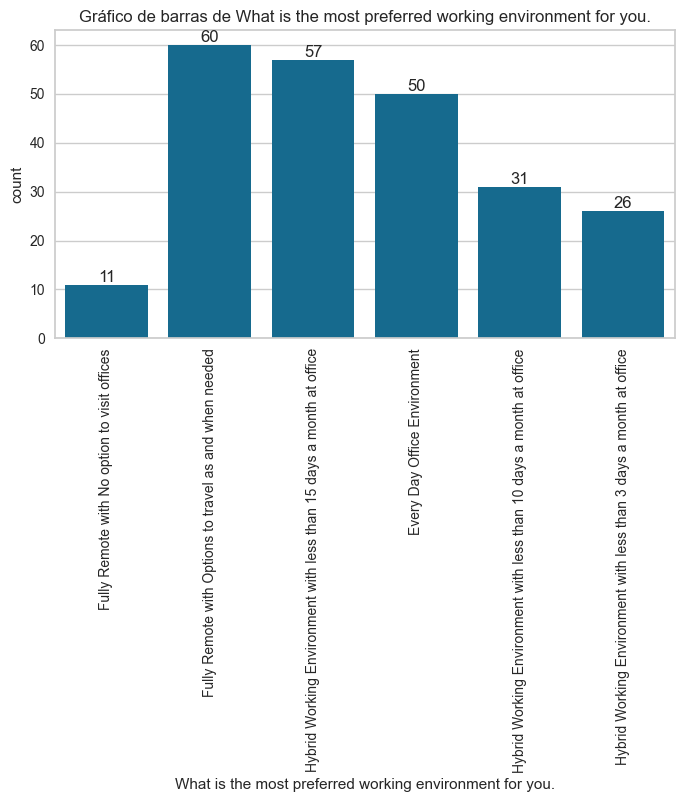

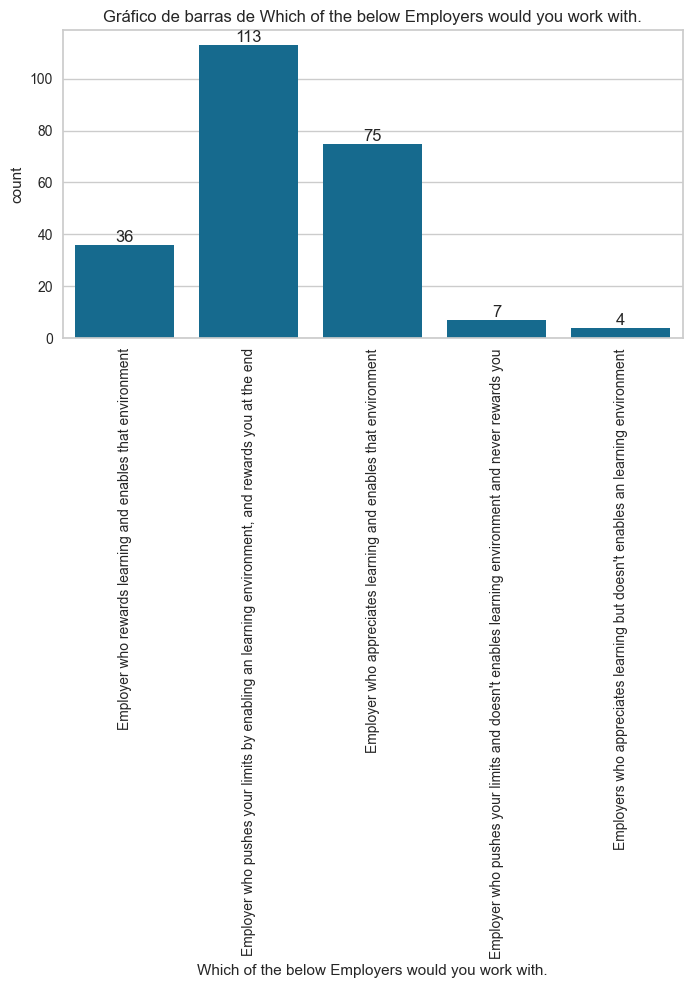

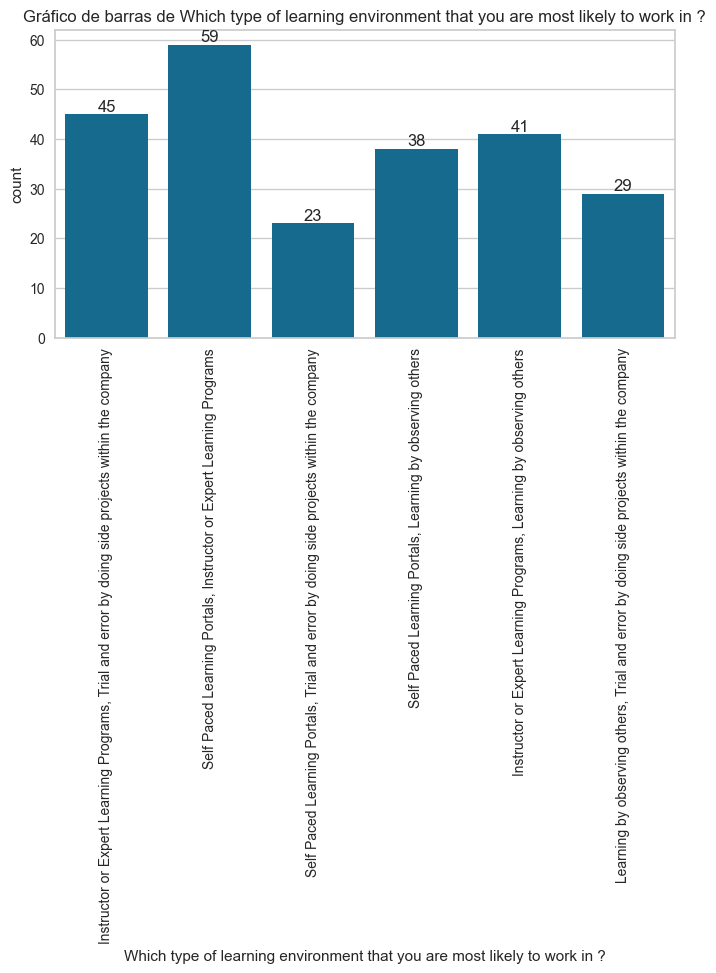

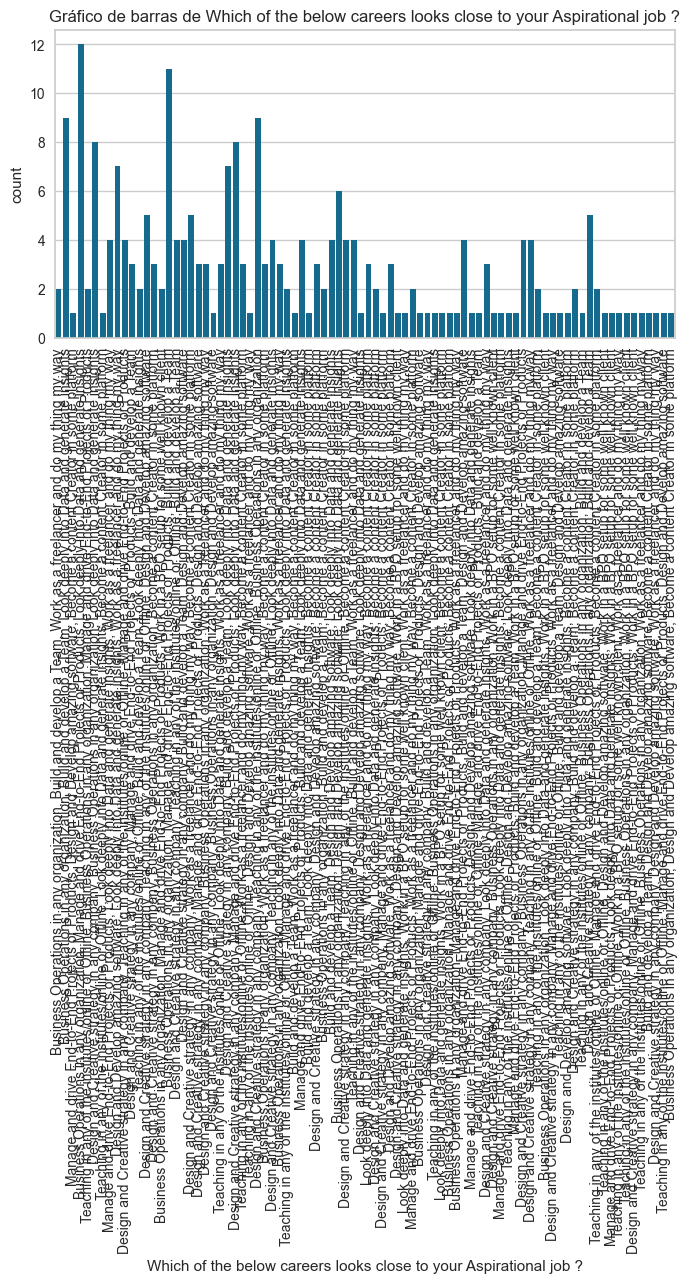

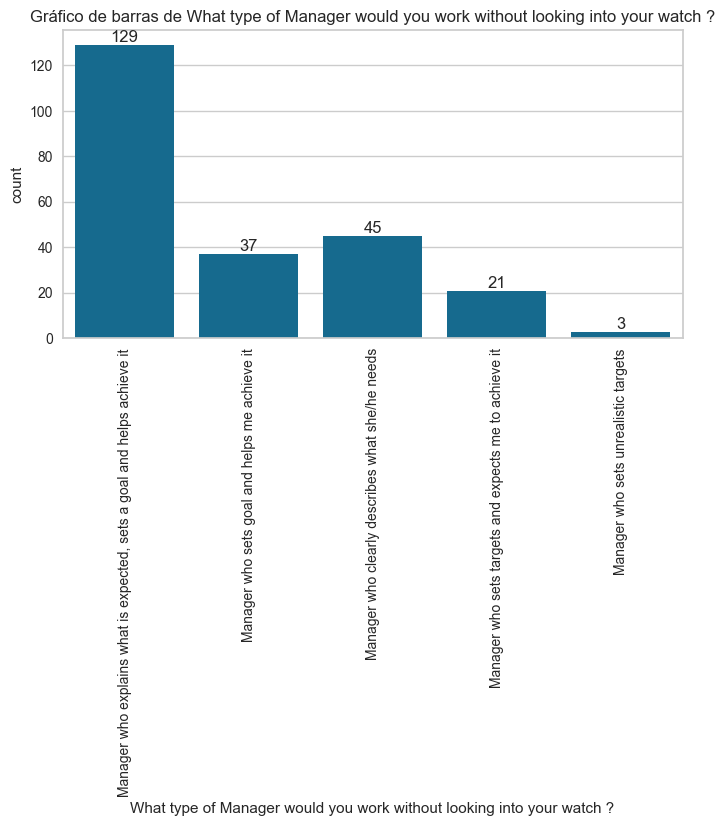

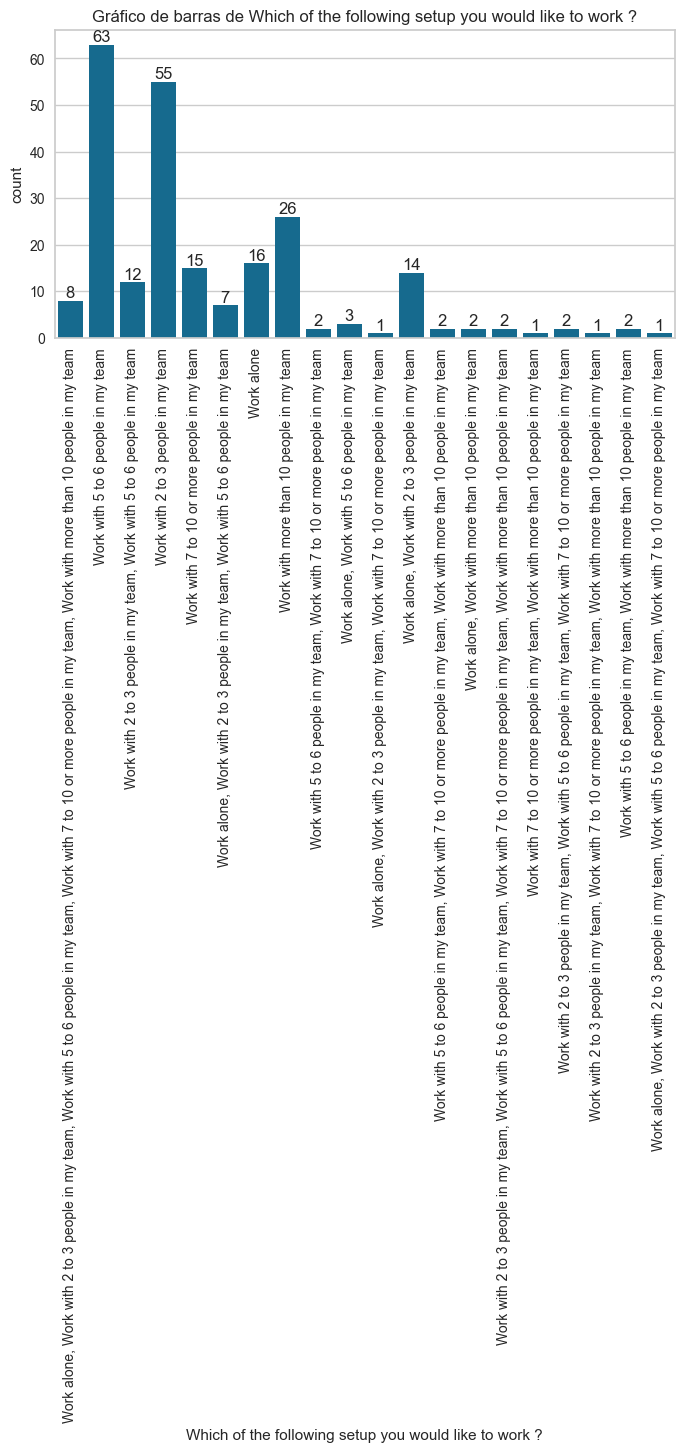

In [79]:
categoricas = df.select_dtypes(include=['object'])
for columna in categoricas.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=columna)
    plt.title(f'Gráfico de barras de {columna}')
    plt.xticks(rotation=90)
    if len(ax.patches) < 25:  # Imprimir valores solo si hay menos de 25 barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

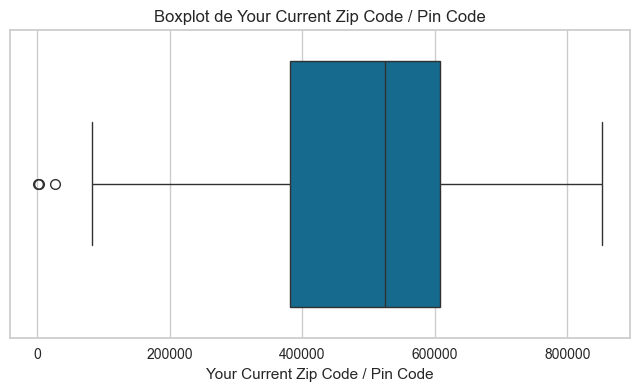

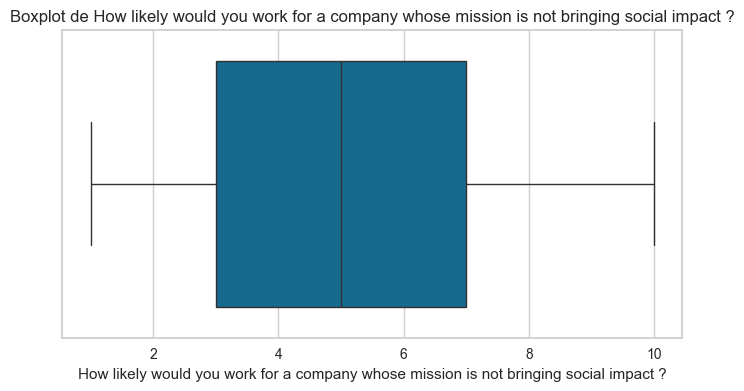

In [80]:
for columna in numericas.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(data=df, x=columna, orient='h')
    plt.title(f'Boxplot de {columna}')
    plt.show()

In [81]:
df.columns

Index(['Your Current Country.', 'Your Current Zip Code / Pin Code',
       'Your Gender',
       'Which of the below factors influence the most about your career aspirations ?',
       'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.',
       'How likely is that you will work for one employer for 3 years or more ?',
       'Would you work for a company whose mission is not clearly defined and publicly posted.',
       'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?',
       'How likely would you work for a company whose mission is not bringing social impact ?',
       'What is the most preferred working environment for you.',
       'Which of the below Employers would you work with.',
       'Which type of learning environment that you are most likely to work in ?',
       'Which of the below careers looks close to your Aspirational job ?',
   

In [82]:
valores_unicos = df['Your Current Zip Code / Pin Code'].unique()
print(valores_unicos)

[273005 851129 123106 834003 301019 768028 722207 400022 201310 679121
 639111 136119 678104 560024 560064 561203 515201 211002 577002 673020
 680613 852201 731021 303007  27287 700063 577528 122003 440002 465674
 577004 826004 515003 496001 713104 416001 110088 110016 131001 505001
 600064 600129 263126 781008 785001 629004 600089 500005 452007 782001
 248001 852218 411038 282007 207001 425301 828122 244901 641021 560060
 560098 457001 524412 110059 425001 851101 431009 828109 224001 110092
 500018 533342 600053 370110 110017 574111 576104 246701 520007 641663
  84321 607104 609305 560029 400013 431109 133001 852131 560072 410206
  83024 474009 400101 560090 380015 700111 281001 517112 711315 400012
 500072 751010 425401 425002 760001 226023 560077 302039  81827 121003
 101201 605401 753003 416509 400099 301001 302017 560096 431005 620005
 786001 422010 110044 700156 824003 410505 151110 721445 251309 713216
 670102 721302 382421 600016 560037 122011 121001 363310 382010 394210
 38202

In [83]:
df.drop('Your Current Zip Code / Pin Code',axis=1,inplace=True)

In [84]:
valores_unicos = df['Which type of learning environment that you are most likely to work in ?'].unique()
print(valores_unicos)

['Instructor or Expert Learning Programs, Trial and error by doing side projects within the company'
 'Self Paced Learning Portals, Instructor or Expert Learning Programs'
 'Self Paced Learning Portals, Trial and error by doing side projects within the company'
 'Self Paced Learning Portals, Learning by observing others'
 'Instructor or Expert Learning Programs, Learning by observing others'
 'Learning by observing others, Trial and error by doing side projects within the company']


In [85]:
valor_buscado = 'Instructor or Expert Learning Programs'
df['Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs'] = df['Which type of learning environment that you are most likely to work in ?'].str.contains(valor_buscado)#.astype(int)

In [86]:
valor_buscado = 'Trial and error by doing side projects within the company'
df['Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company'] = df['Which type of learning environment that you are most likely to work in ?'].str.contains(valor_buscado)#.astype(int)

In [87]:
valor_buscado = 'Self Paced Learning Portals'
df['Which type of learning environment that you are most likely to work in ?$Self Paced Learning Portals'] = df['Which type of learning environment that you are most likely to work in ?'].str.contains(valor_buscado)#.astype(int)

In [88]:
valor_buscado = 'Learning by observing others'
df['Which type of learning environment that you are most likely to work in ?$Learning by observing others'] = df['Which type of learning environment that you are most likely to work in ?'].str.contains(valor_buscado)#.astype(int)

In [89]:
df.drop('Which type of learning environment that you are most likely to work in ?',axis = 1, inplace = True)

In [90]:
valores_unicos = df['Which of the below careers looks close to your Aspirational job ?'].unique()
print(valores_unicos)

['Business Operations in any organization, Build and develop a Team, Work as a freelancer and do my thing my way'
 'Business Operations in any organization, Build and develop a Team, Look deeply into Data and generate insights'
 'Manage and drive End-to-End Projects or Products, Design and Develop amazing software, Become a content Creator in some platform'
 'Business Operations in any organization, Manage and drive End-to-End Projects or Products, Look deeply into Data and generate insights'
 'Teaching in any of the institutes/online or Offline, Business Operations in any organization, Manage and drive End-to-End Projects or Products'
 'Design and Creative strategy in any company, Business Operations in any organization, Look deeply into Data and generate insights'
 'Teaching in any of the institutes/online or Offline, Look deeply into Data and generate insights, Become a content Creator in some platform'
 'Manage and drive End-to-End Projects or Products, Look deeply into Data and ge

In [91]:
valor_buscado = 'Business Operations in any organization'
df['Which of the below careers looks close to your Aspirational job ?$Business Operations in any organization'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [92]:
valor_buscado = 'Design and Develop amazing software'
df['Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [93]:
valor_buscado = 'Become a content Creator in some platform'
df['Which of the below careers looks close to your Aspirational job ?$Become a content Creator in some platform'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [94]:
valor_buscado = 'Manage and drive End-to-End Projects or Products'
df['Which of the below careers looks close to your Aspirational job ?$Manage and drive End-to-End Projects or Products'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [95]:
valor_buscado = 'Teaching in any of the institutes/online or Offline'
df['Which of the below careers looks close to your Aspirational job ?$Teaching in any of the institutes/online or Offline'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [96]:
valor_buscado = 'Work as a freelancer and do my thing my way'
df['Which of the below careers looks close to your Aspirational job ?$Work as a freelancer and do my thing my way'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [97]:
valor_buscado = 'Design and Creative strategy in any company'
df['Which of the below careers looks close to your Aspirational job ?$Design and Creative strategy in any company'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [98]:
valor_buscado = 'Build and develop a Team'
df['Which of the below careers looks close to your Aspirational job ?$Build and develop a Team'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [99]:
valor_buscado = 'Work in a BPO setup for some well known client'
df['Which of the below careers looks close to your Aspirational job ?$Work in a BPO setup for some well known client'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [100]:
valor_buscado = 'Look deeply into Data and generate insights'
df['Which of the below careers looks close to your Aspirational job ?$Look deeply into Data and generate insights'] = df['Which of the below careers looks close to your Aspirational job ?'].str.contains(valor_buscado)#.astype(int)

In [101]:
df.drop('Which of the below careers looks close to your Aspirational job ?',axis = 1, inplace = True)

In [102]:
valores_unicos = df['Which of the following setup you would like to work ?'].unique()
print(valores_unicos)

['Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team'
 'Work with 5 to 6 people in my team'
 'Work with 2 to 3 people in my team, Work with 5 to 6 people in my team'
 'Work with 2 to 3 people in my team'
 'Work with 7 to 10 or more people in my team'
 'Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team'
 'Work alone' 'Work with more than 10 people in my team'
 'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team'
 'Work alone, Work with 5 to 6 people in my team'
 'Work alone, Work with 2 to 3 people in my team, Work with 7 to 10 or more people in my team'
 'Work alone, Work with 2 to 3 people in my team'
 'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team'
 'Work alone, Work with more than 10 people in my team'
 'Work with 2 to 3 people in

In [103]:
valor_buscado = 'Work with 2 to 3 people in my team'
df['Which of the following setup you would like to work ?$Work with 2 to 3 people in my team'] = df['Which of the following setup you would like to work ?'].str.contains(valor_buscado)#.astype(int)

In [104]:
valor_buscado = 'Work with 5 to 6 people in my team'
df['Which of the following setup you would like to work ?$Work with 5 to 6 people in my team'] = df['Which of the following setup you would like to work ?'].str.contains(valor_buscado)#.astype(int)

In [105]:
valor_buscado = 'Work alone'
df['Which of the following setup you would like to work ?$Work alone'] = df['Which of the following setup you would like to work ?'].str.contains(valor_buscado)#.astype(int)

In [106]:
valor_buscado = 'Work with 7 to 10 or more people in my team'
df['Which of the following setup you would like to work ?$Work with 7 to 10 or more people in my team'] = df['Which of the following setup you would like to work ?'].str.contains(valor_buscado)#.astype(int)

In [107]:
valor_buscado = 'Work with more than 10 people in my team'
df['Which of the following setup you would like to work ?$Work with more than 10 people in my team'] = df['Which of the following setup you would like to work ?'].str.contains(valor_buscado)#.astype(int)

In [108]:
df.drop('Which of the following setup you would like to work ?',axis = 1, inplace = True)

In [109]:
df.head()

Your Current Country. Your Gender  \
0                 India        Male   
1                 India        Male   
2                 India      Female   
3                 India        Male   
4                 India      Female   

  Which of the below factors influence the most about your career aspirations ?  \
0       People who have changed the world for better                              
1       People who have changed the world for better                              
2                         Social Media like LinkedIn                              
3      People from my circle, but not family members                              
4             Influencers who had successful careers                              

  Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.  \
0                       Yes, I will earn and do that                                                                         
1      No, But if someone could bare the cost I will                                                                         
2                       Yes, I will earn and do that                                                                         
3      No, But if someone could bare the cost I will                                                                         
4      No, But if someone could bare the cost I will                                                                         

  How likely is that you will work for one employer for 3 years or more ?  \
0  This will be hard to do, but if it is the righ...                        
1  This will be hard to do, but if it is the righ...                        
2                      Will work for 3 years or more                        
3  This will be hard to do, but if it is the righ...                        
4                      Will work for 3 years or more                        

  Would you work for a company whose mission is not clearly defined and publicly posted.  \
0                                                 No                                       
1                                                 No                                       
2                                                Yes                                       
3                                                 No                                       
4                                                 No                                       

  How likely would you work for a company whose mission is misaligned with their public actions or even their product ?  \
0                             Will NOT work for them                                                                      
1                             Will NOT work for them                                                                      
2                                 Will work for them                                                                      
3                             Will NOT work for them                                                                      
4                             Will NOT work for them                                                                      

   How likely would you work for a company whose mission is not bringing social impact ?  \
0                                                  4                                       
1                                                  1                                       
2                                                  7                                       
3                                                  6                                       
4                                                  5                                       

  What is the most preferred working environment for you.  \
0       Fully Remote with No option to visit offices        
1  Fully Remote with Options to travel as and whe...        
2  Hybrid Working En

In [110]:
def dummies(df, colum):
    df_dummies = pd.get_dummies(df[colum], prefix=colum, prefix_sep='$')
    df = pd.concat([df, df_dummies], axis=1)
    df = df.drop(colum, axis = 1)
    return df

df = dummies(df,'Your Current Country.')
df = dummies(df,'Your Gender')
df = dummies(df,'Which of the below factors influence the most about your career aspirations ?')
df = dummies(df,'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.')
df = dummies(df,'How likely is that you will work for one employer for 3 years or more ?')
df = dummies(df,'What type of Manager would you work without looking into your watch ?')
df = dummies(df,'Which of the below Employers would you work with.')
df = dummies(df,'What is the most preferred working environment for you.')
#df = dummies(df,'Your Current Zip Code / Pin Code')
df = dummies(df,'How likely would you work for a company whose mission is not bringing social impact ?')
df = dummies(df,'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?')
df = dummies(df,'Would you work for a company whose mission is not clearly defined and publicly posted.')
df.head()

Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs  \
0                                               True                                                                 
1                                               True                                                                 
2                                              False                                                                 
3                                               True                                                                 
4                                              False                                                                 

   Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company  \
0                                               True                                                                                    
1                                              False                                                                                    
2                                               True                                                                                    
3                                               True                                                                                    
4                                              False                                                                                    

   Which type of learning environment that you are most likely to work in ?$Self Paced Learning Portals  \
0                                              False                                                      
1                                               True                                                      
2                                               True                                                      
3                                              False                                                      
4                                               True                                                      

   Which type of learning environment that you are most likely to work in ?$Learning by observing others  \
0                                              False                                                       
1                                              False                                                       
2                                              False                                                       
3                                              False                                                       
4                                               True                                                       

   Which of the below careers looks close to your Aspirational job ?$Business Operations in any organization  \
0                                               True                                                           
1                                               True                                                           
2                                              False                                                           
3                                               True                                                           
4                                               True                                                           

   Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software  \
0                                              False                                                       
1                                              False                                                       
2                                               True                                                       
3                                              False                      

In [111]:
df.columns

Index(['Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs',
       'Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company',
       'Which type of learning environment that you are most likely to work in ?$Self Paced Learning Portals',
       'Which type of learning environment that you are most likely to work in ?$Learning by observing others',
       'Which of the below careers looks close to your Aspirational job ?$Business Operations in any organization',
       'Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software',
       'Which of the below careers looks close to your Aspirational job ?$Become a content Creator in some platform',
       'Which of the below careers looks close to your Aspirational job ?$Manage and drive End-to-End Projects or Products',
       'Which of the below careers looks cl

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 66 columns):
 #   Column                                                                                                                                                                                 Non-Null Count  Dtype
---  ------                                                                                                                                                                                 --------------  -----
 0   Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs                                                                        235 non-null    bool 
 1   Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company                                                     235 non-null    bool 
 2   Which type of learning environment that you are mo

In [113]:
numericas = df.select_dtypes(include=['int64', 'float64', 'int32'])
for columna in numericas.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(data=df, x=columna, kde=True)
    plt.title(f'Histograma de {columna}')
    if len(ax.patches) < 25:  # Imprimir valores solo si hay menos de 25 barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


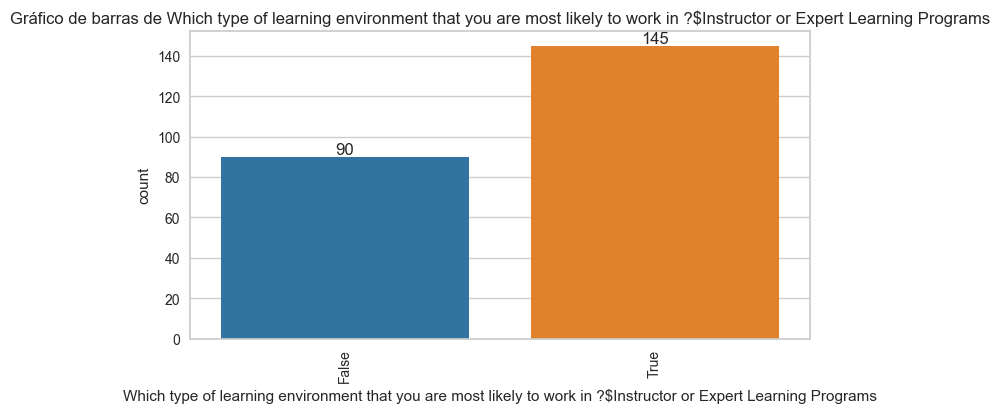

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


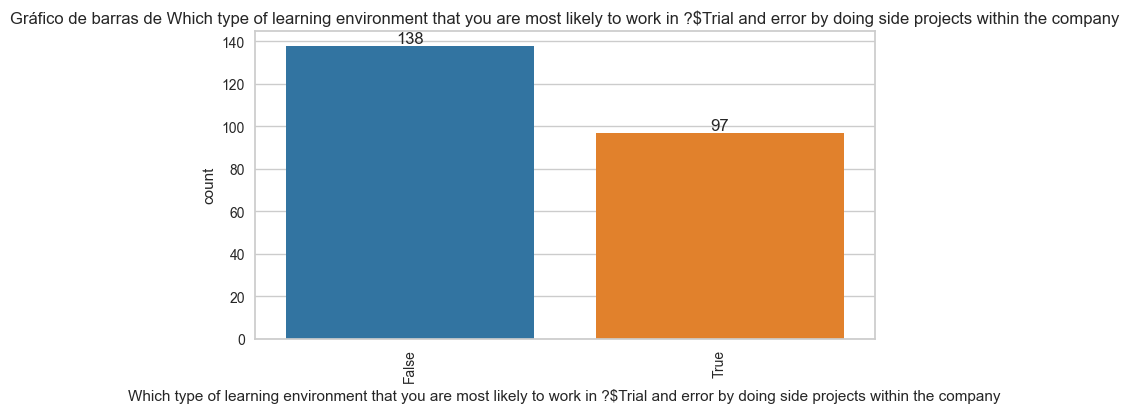

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


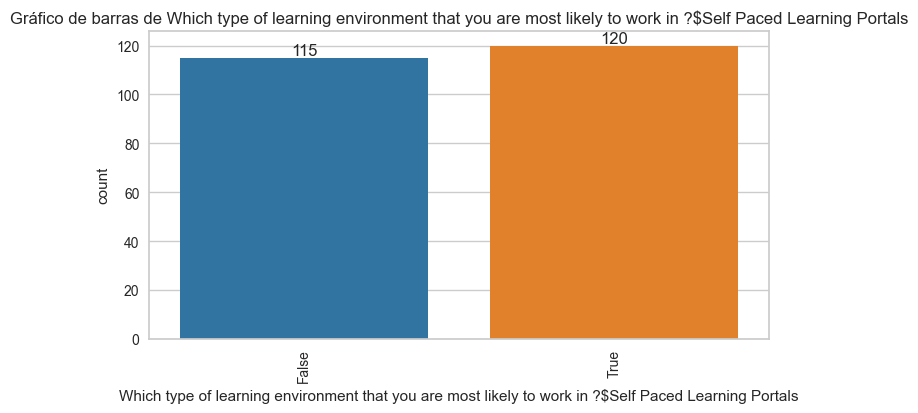

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


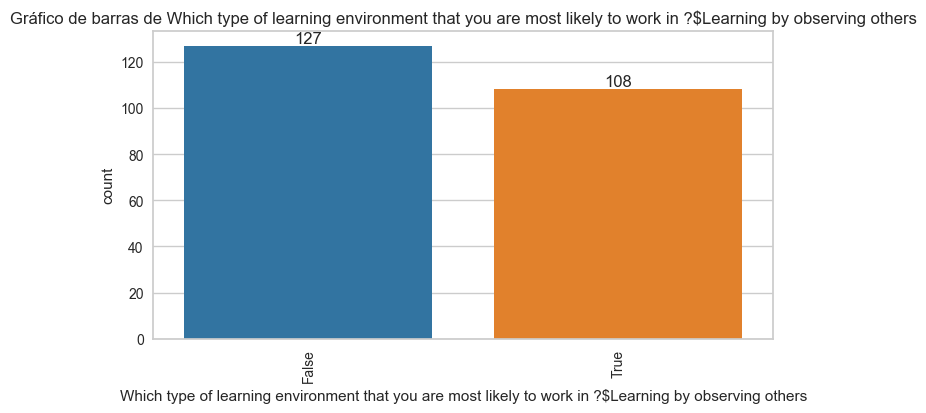

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


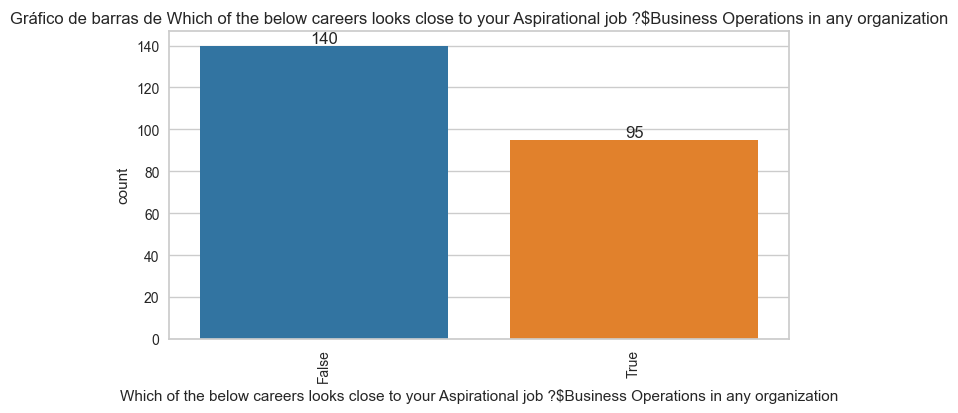

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


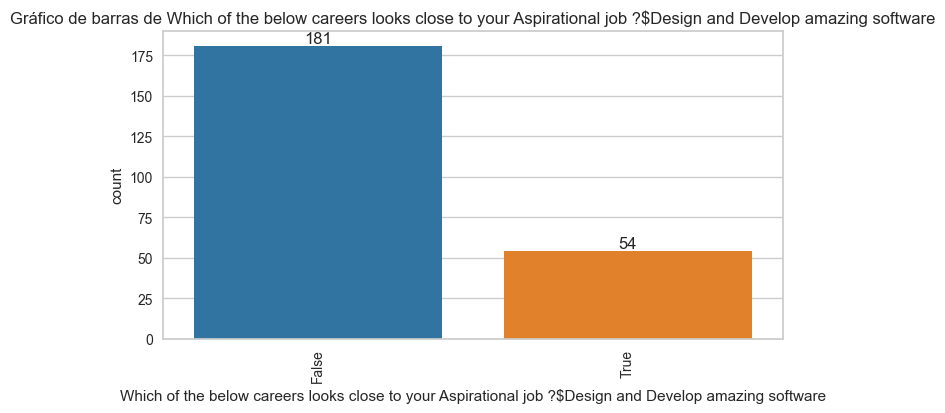

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


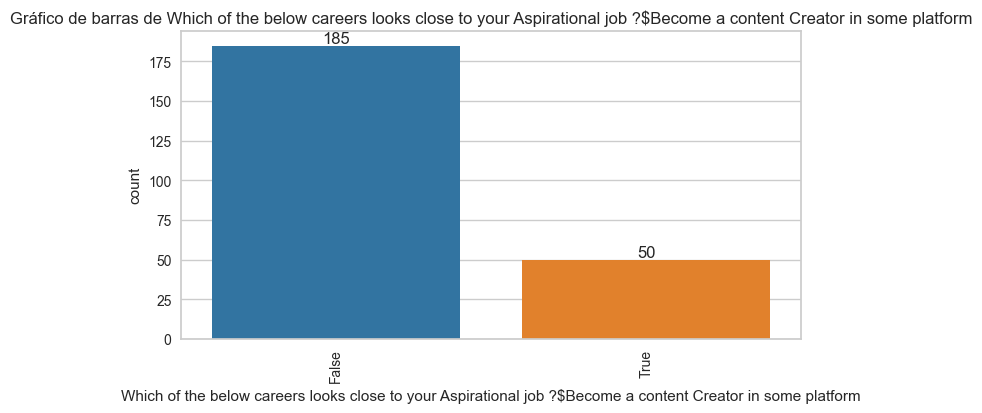

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


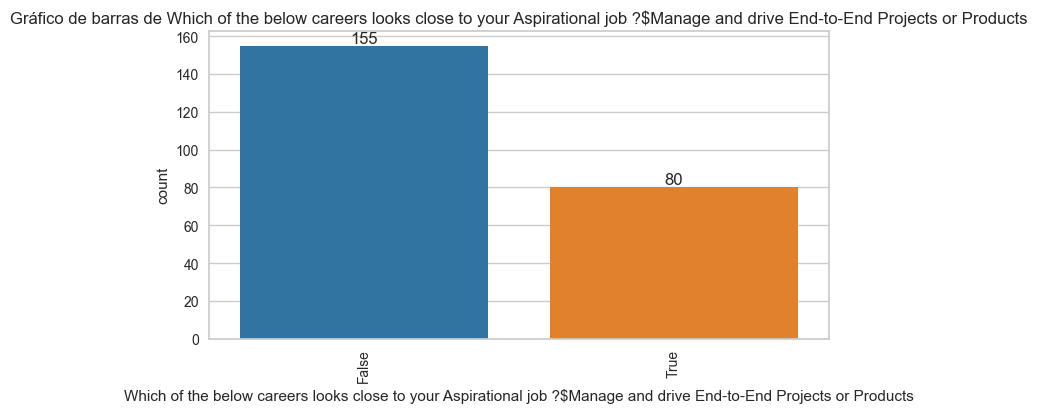

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


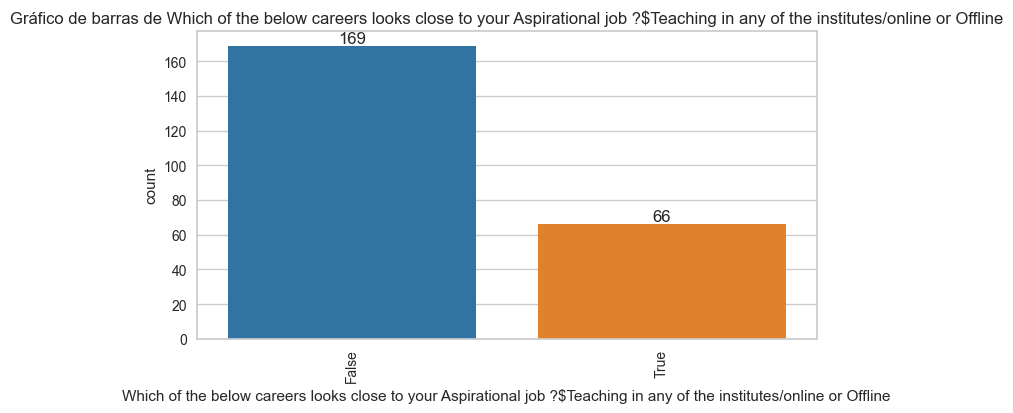

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


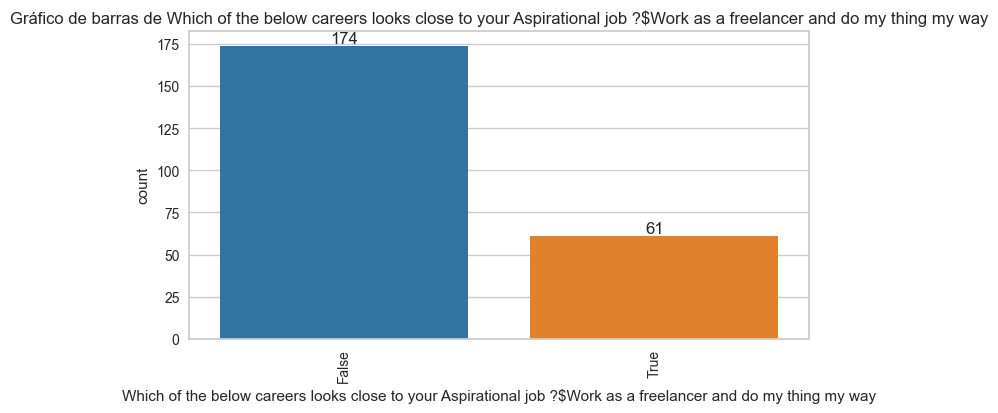

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


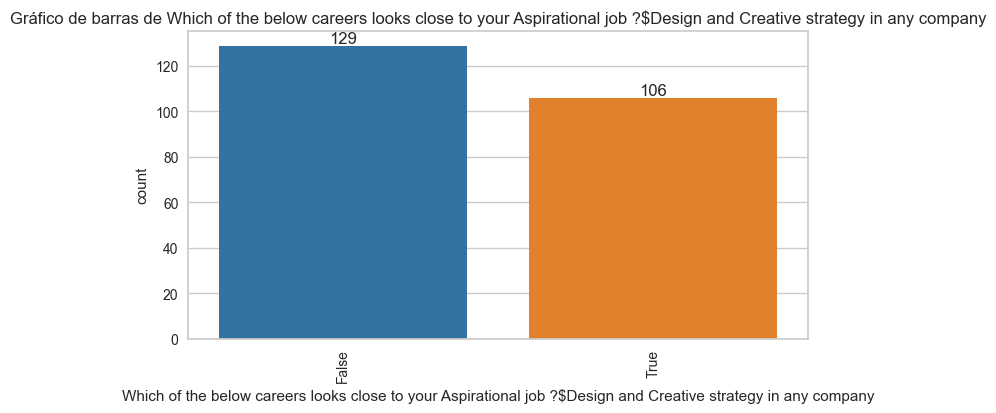

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


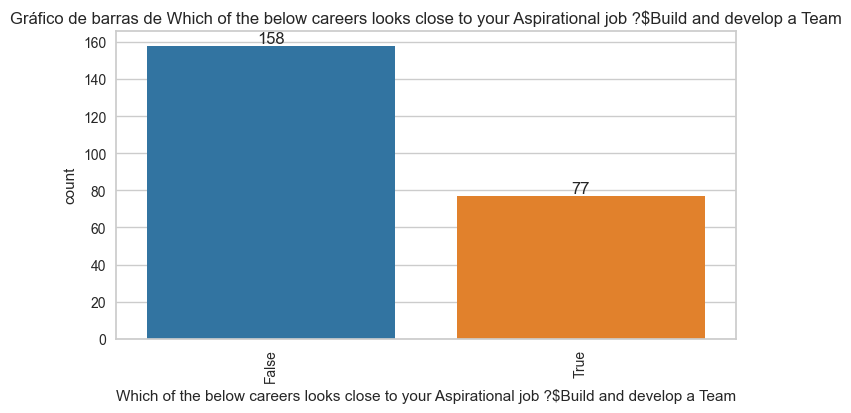

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


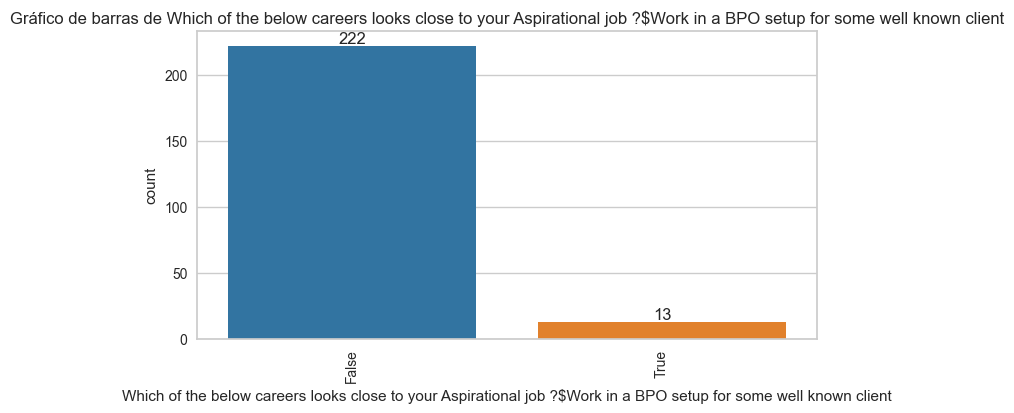

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


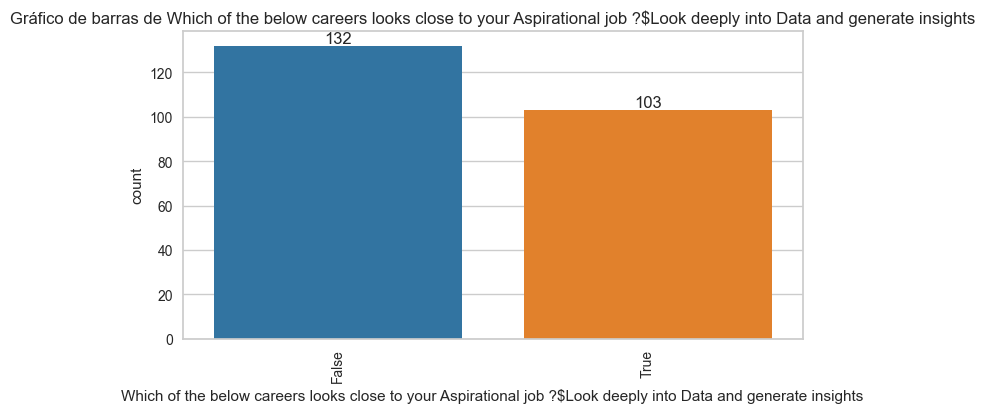

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


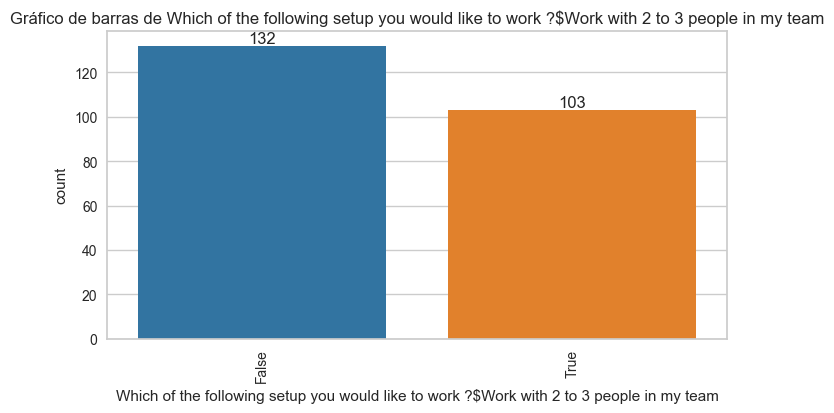

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


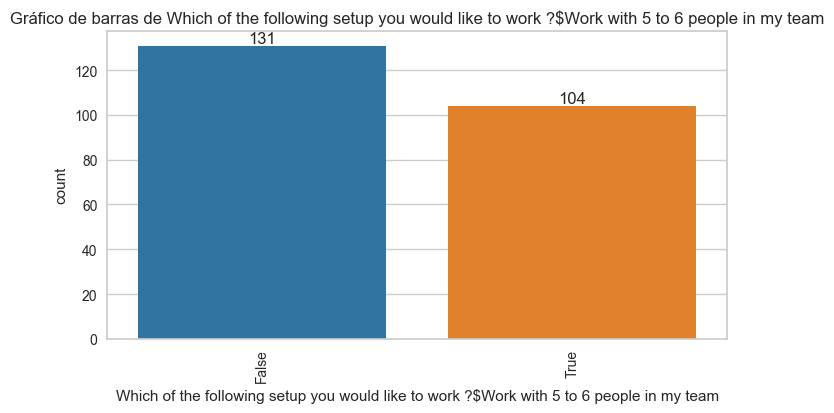

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


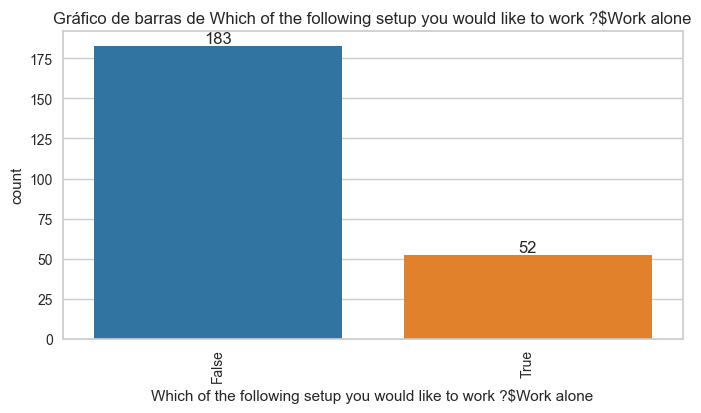

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


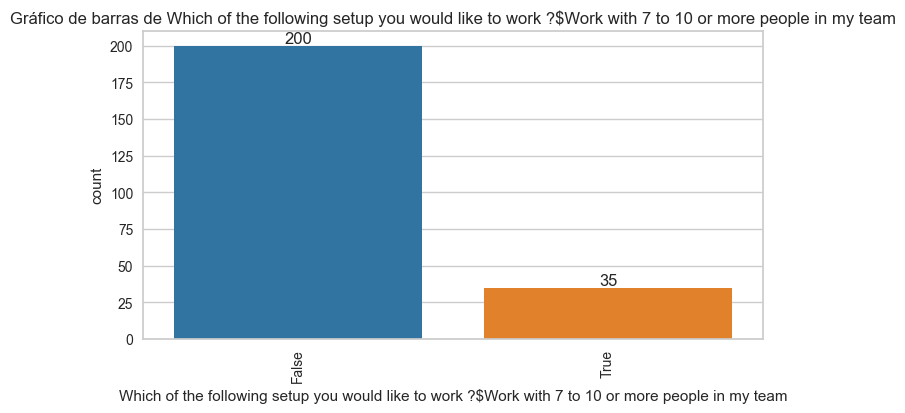

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


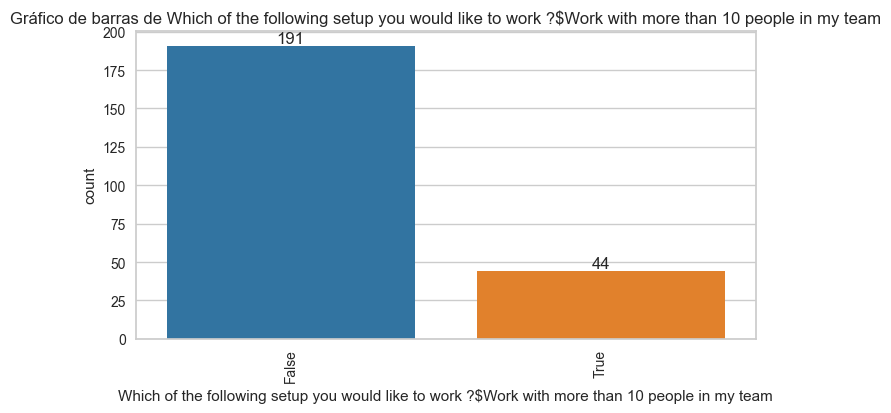

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


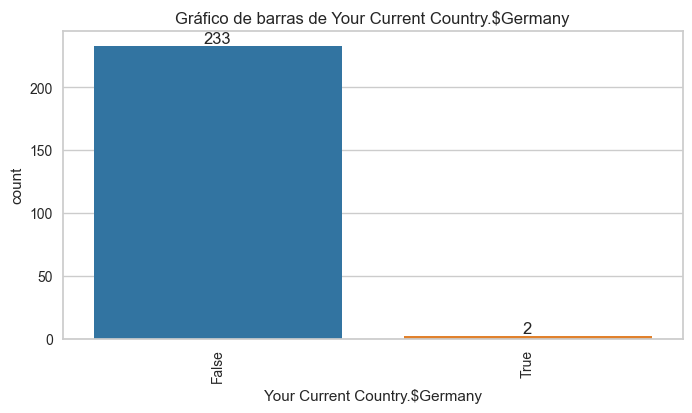

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


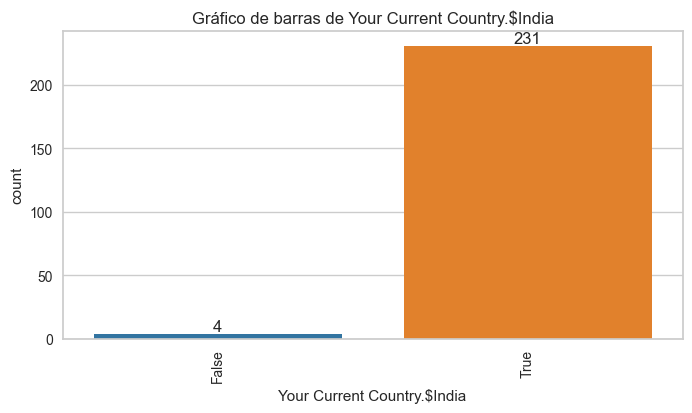

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


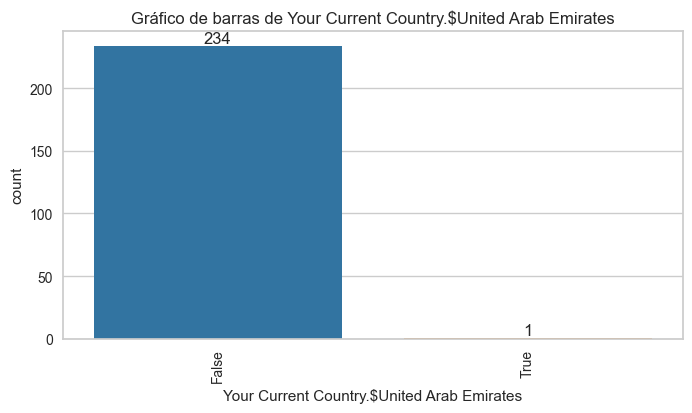

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


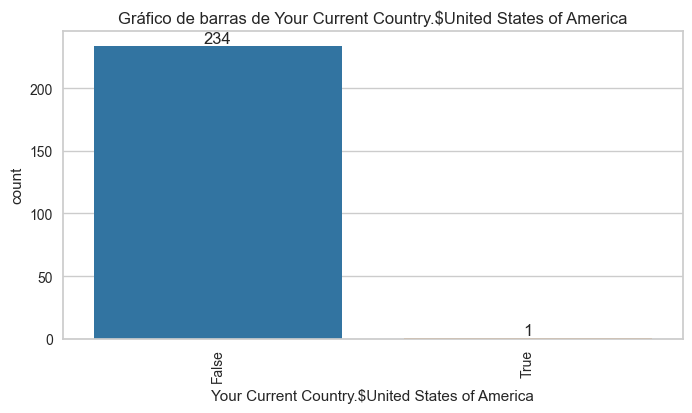

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


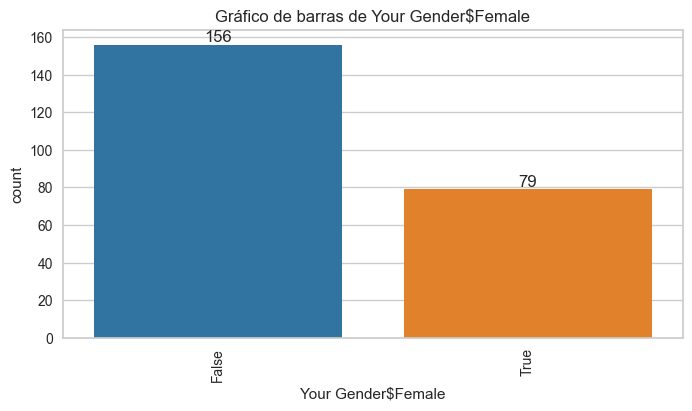

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


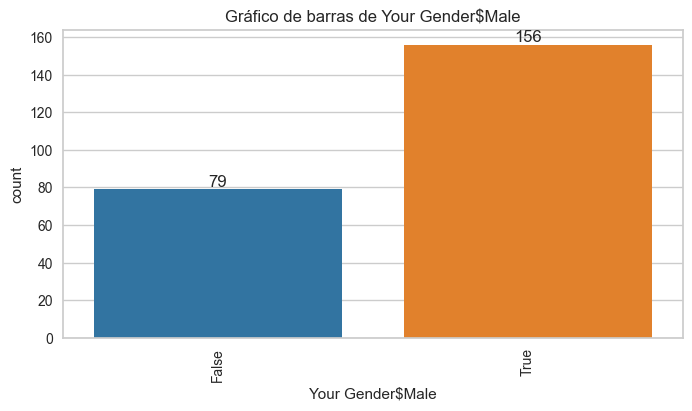

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


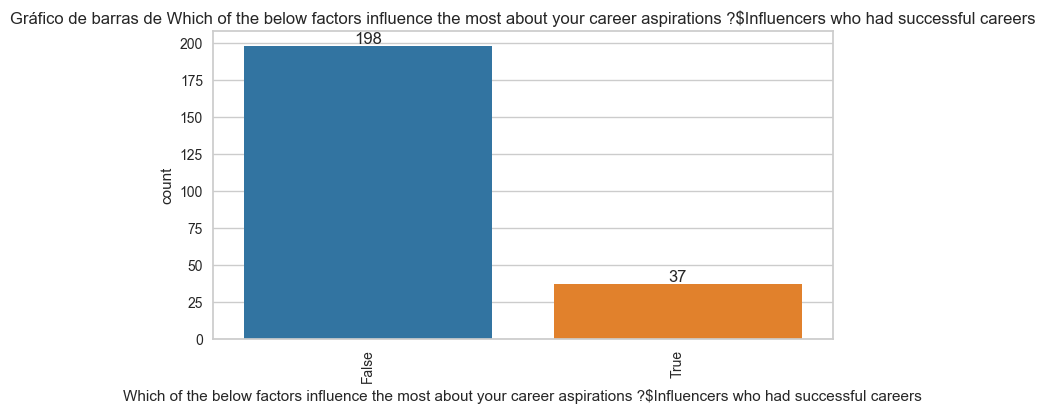

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


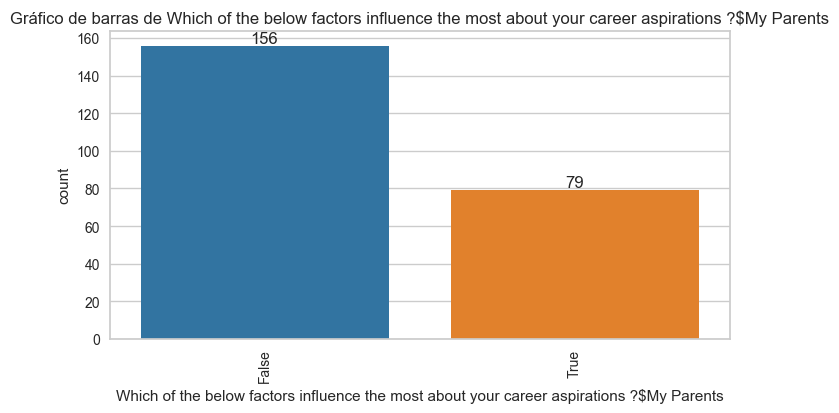

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


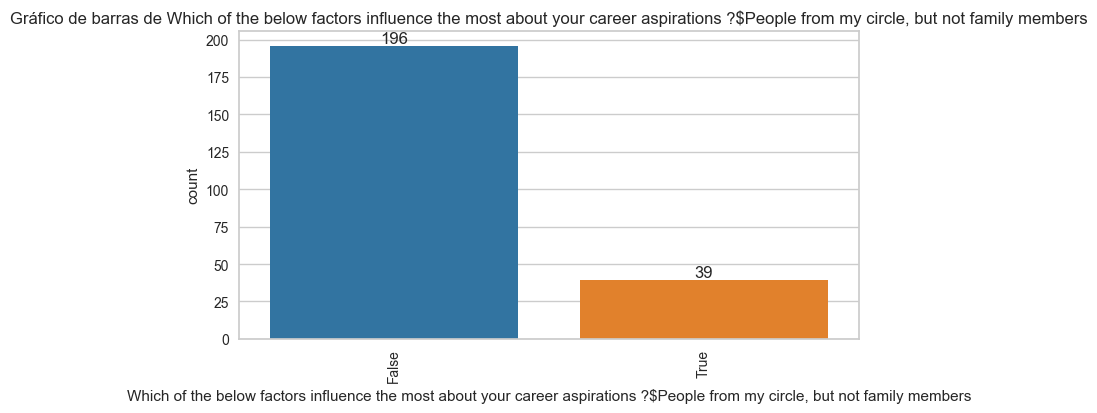

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


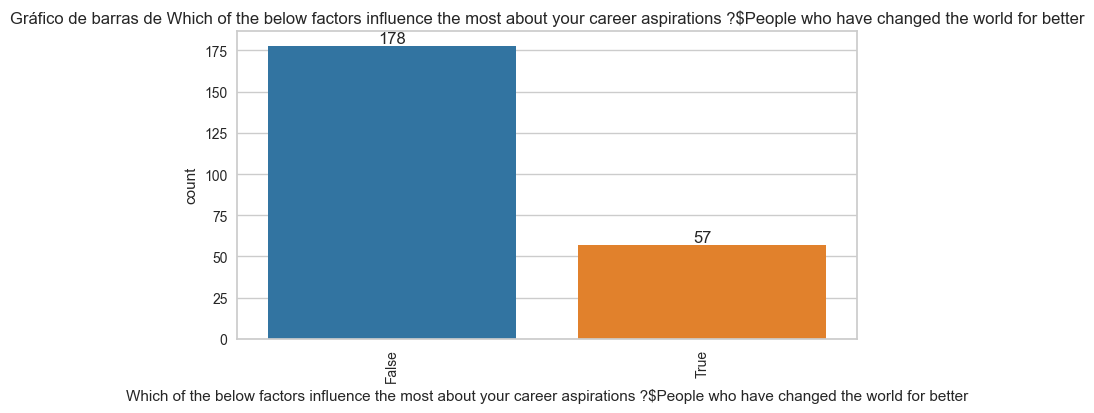

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


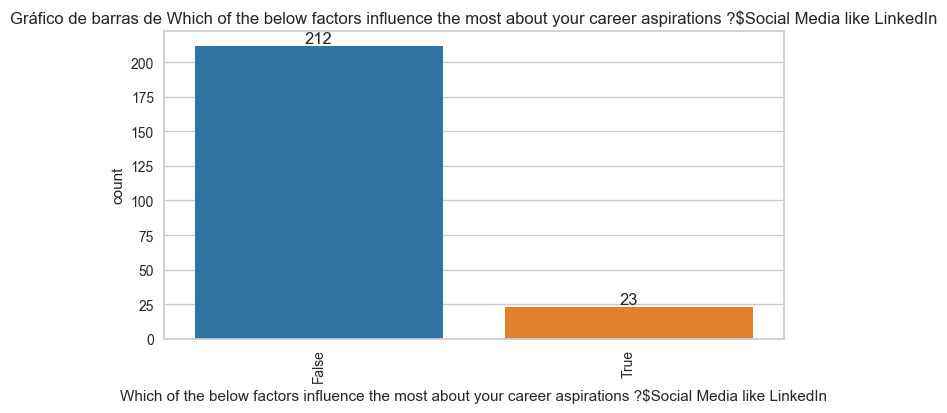

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


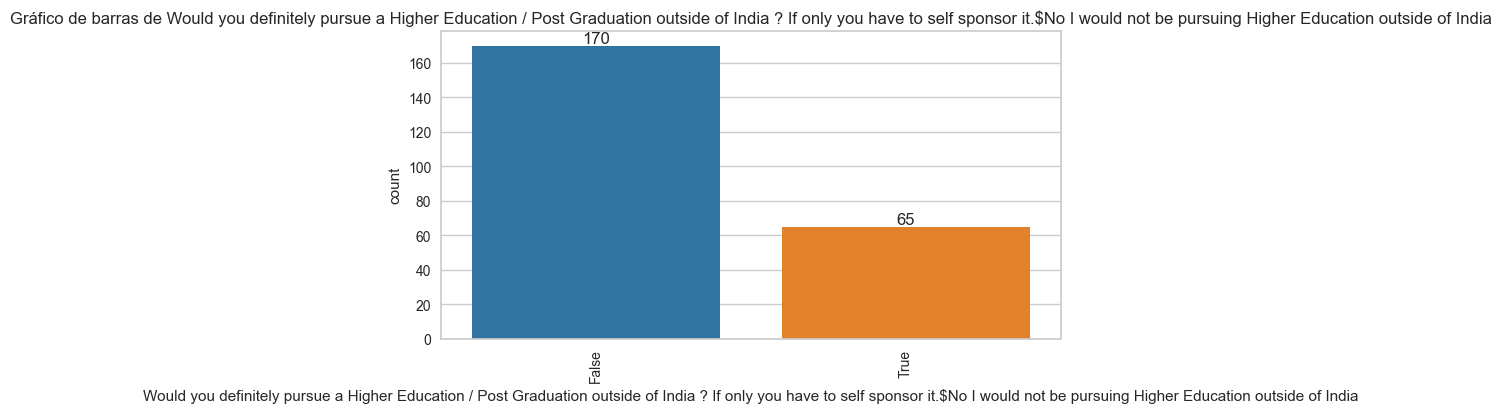

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


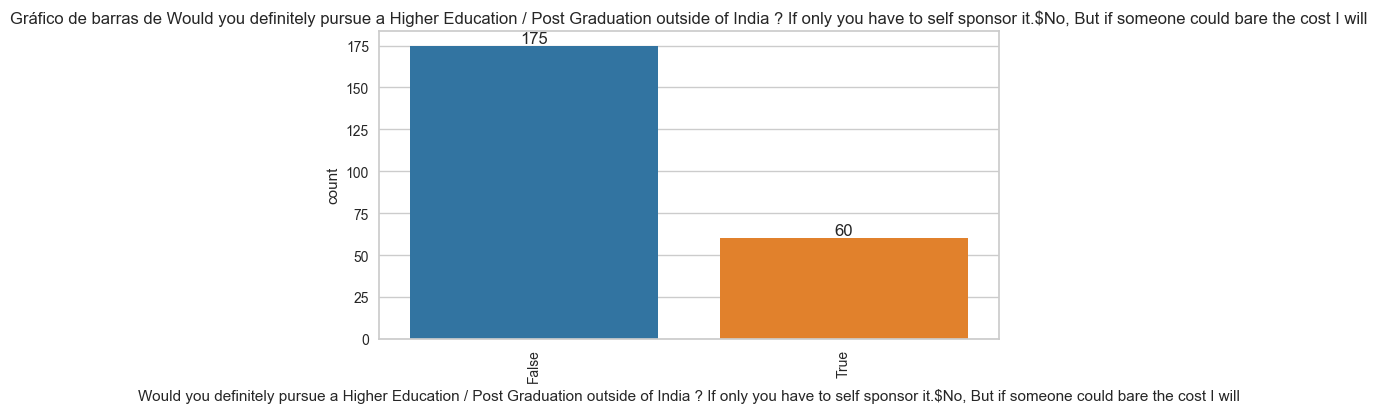

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


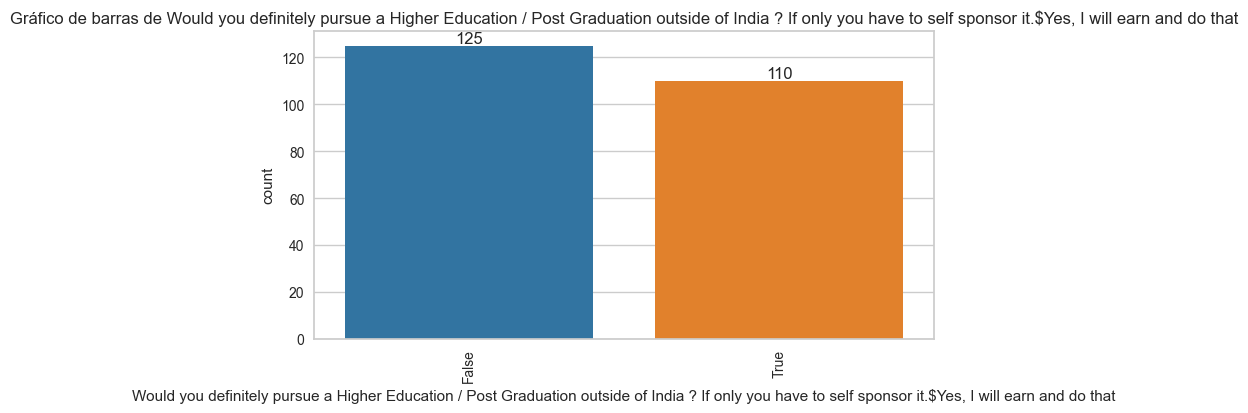

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


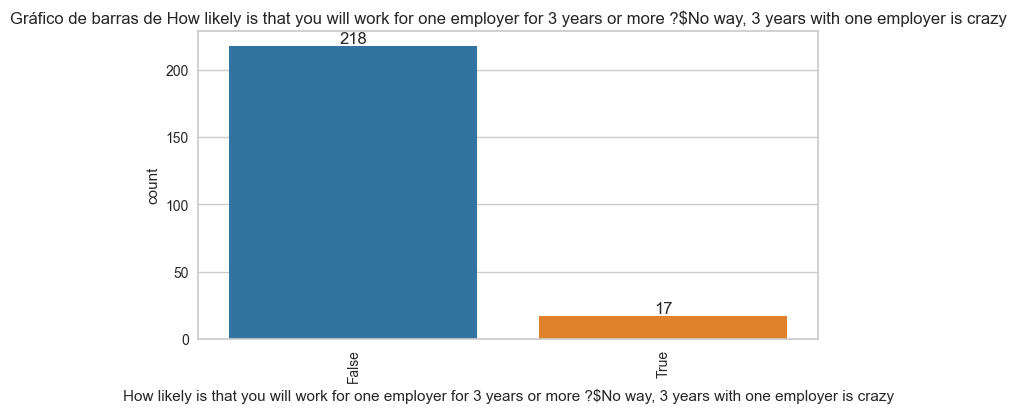

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


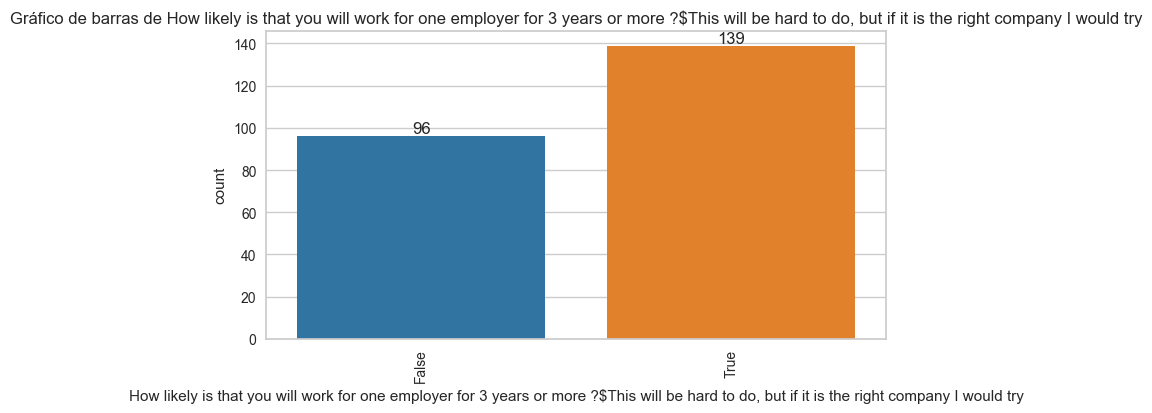

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


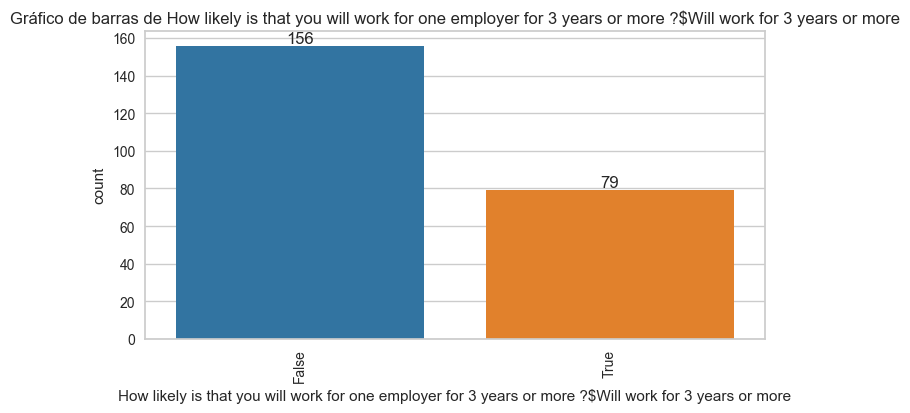

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


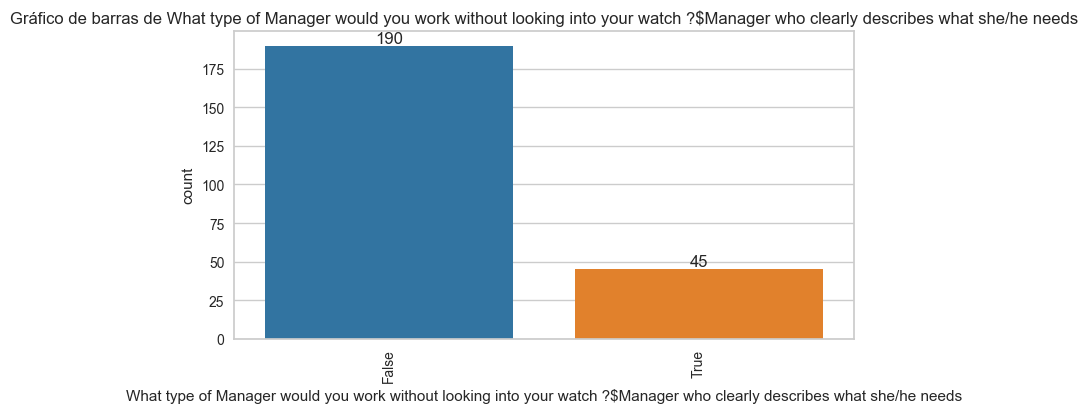

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


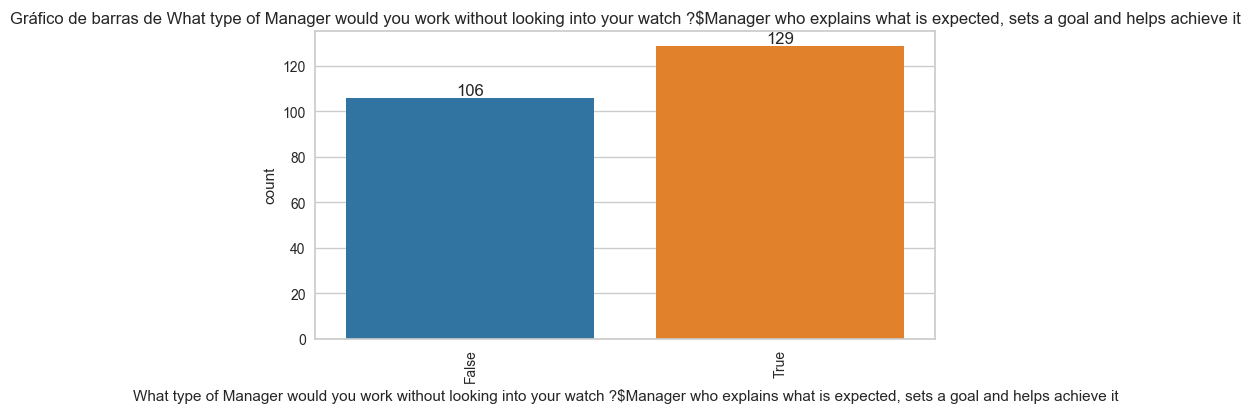

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


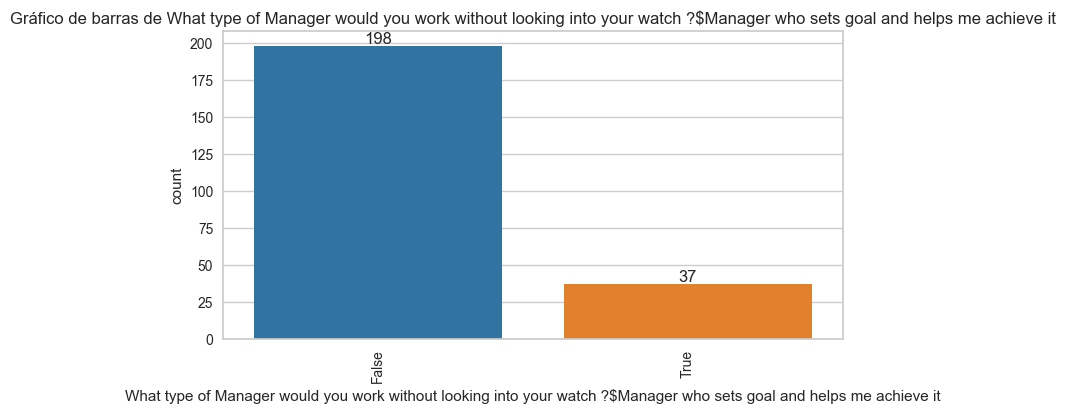

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


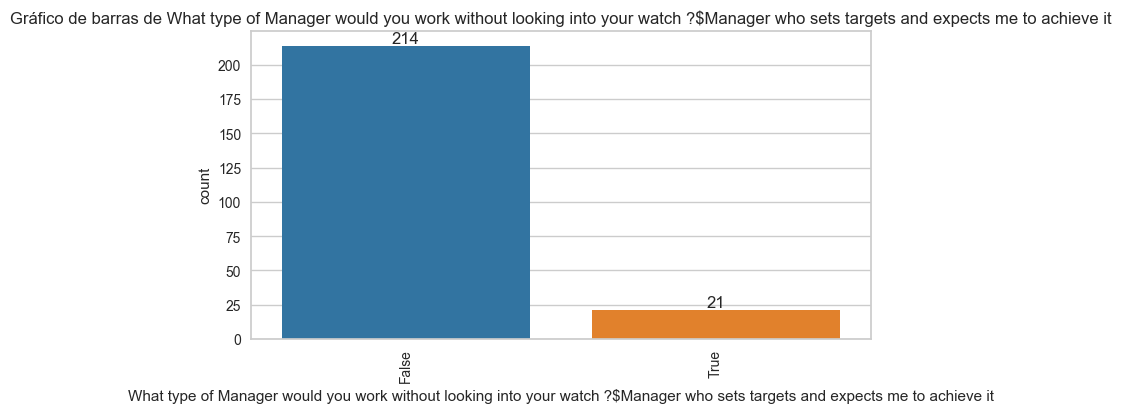

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


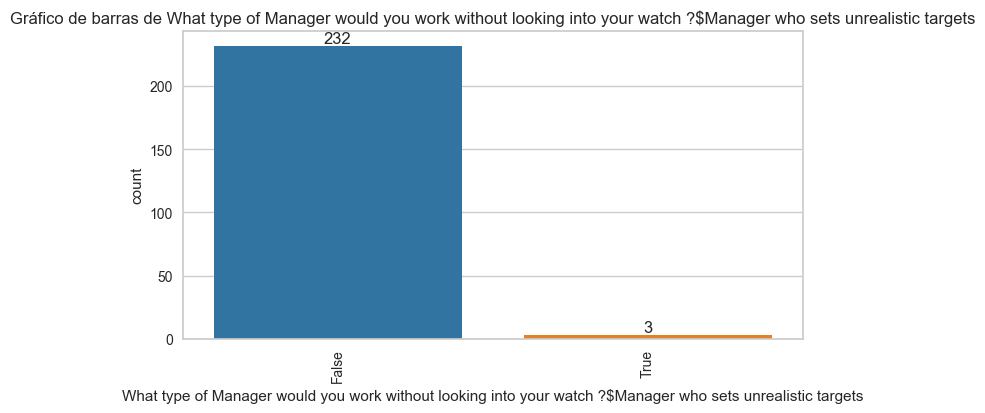

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


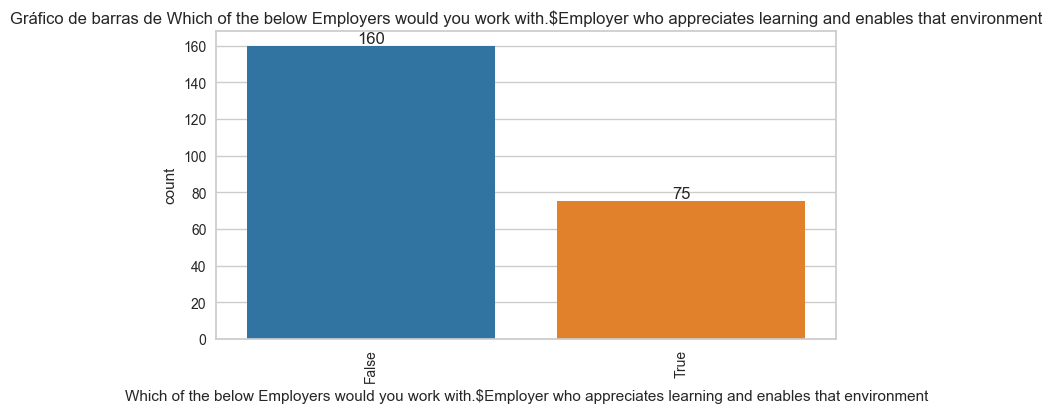

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


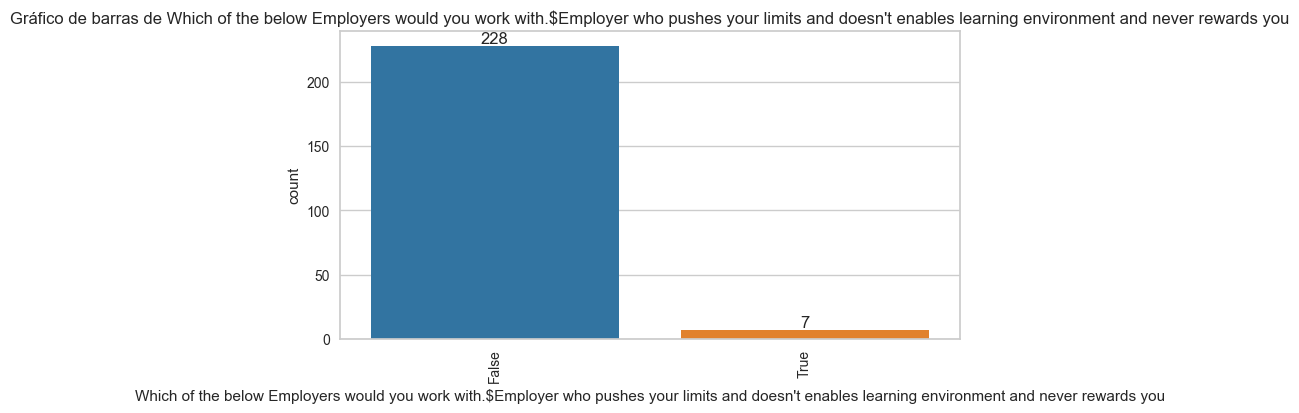

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


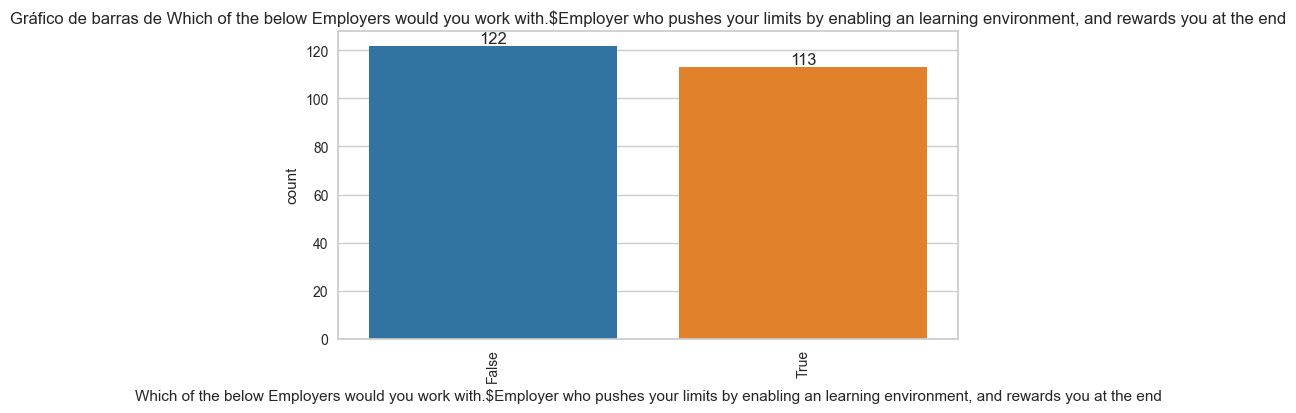

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


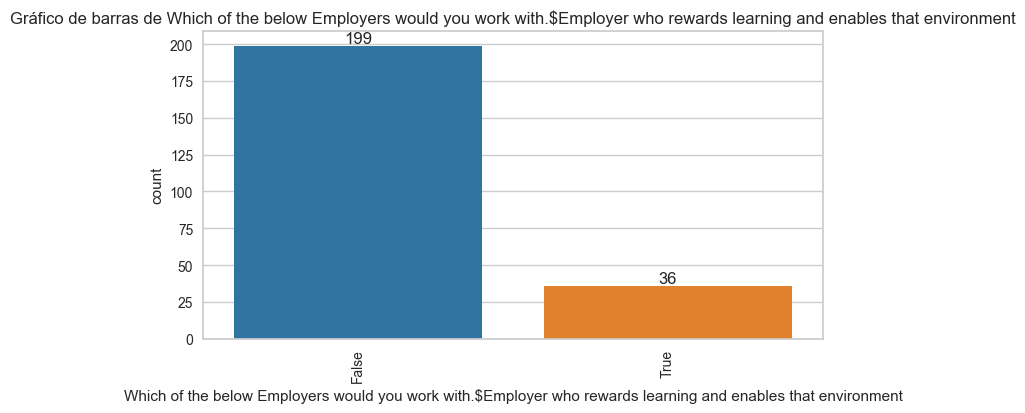

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


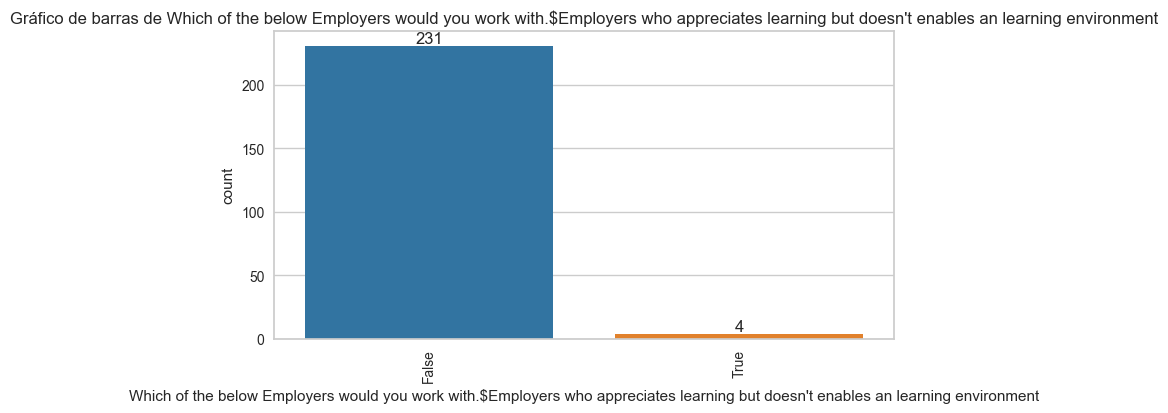

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


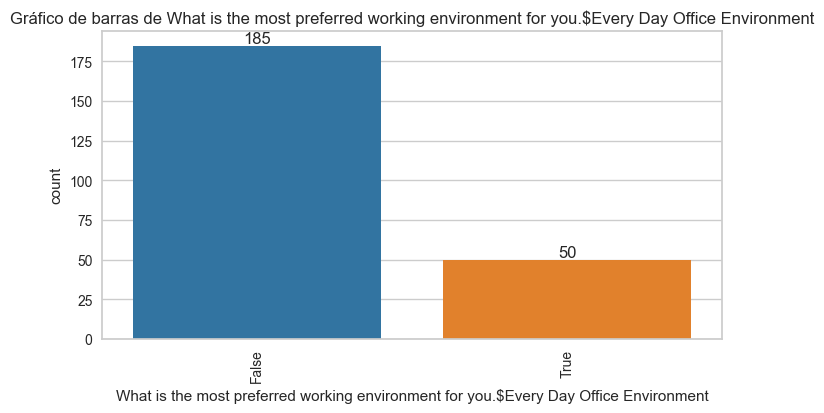

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


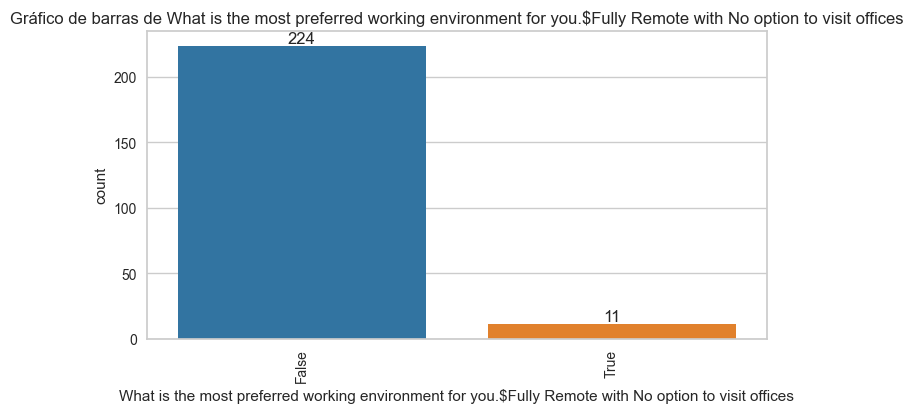

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


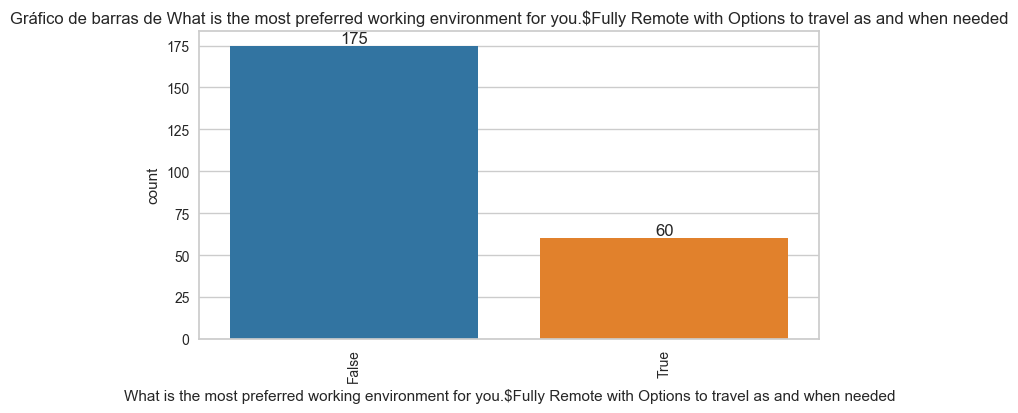

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


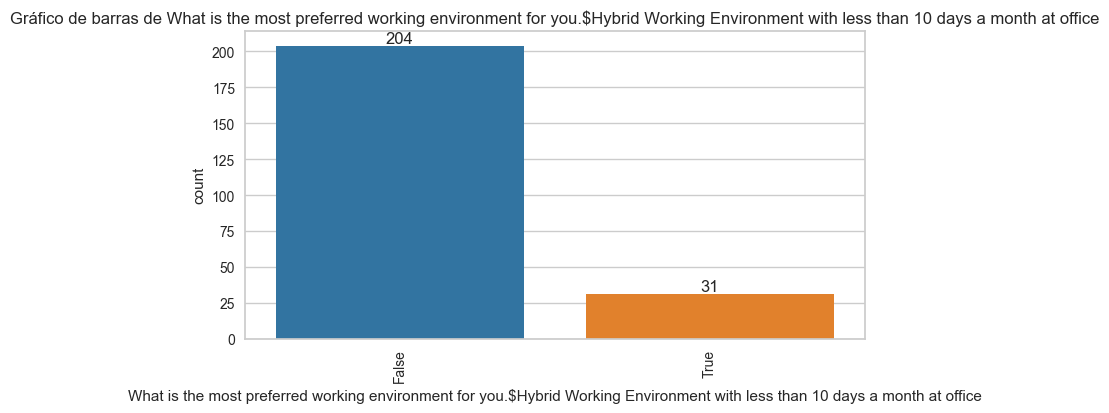

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


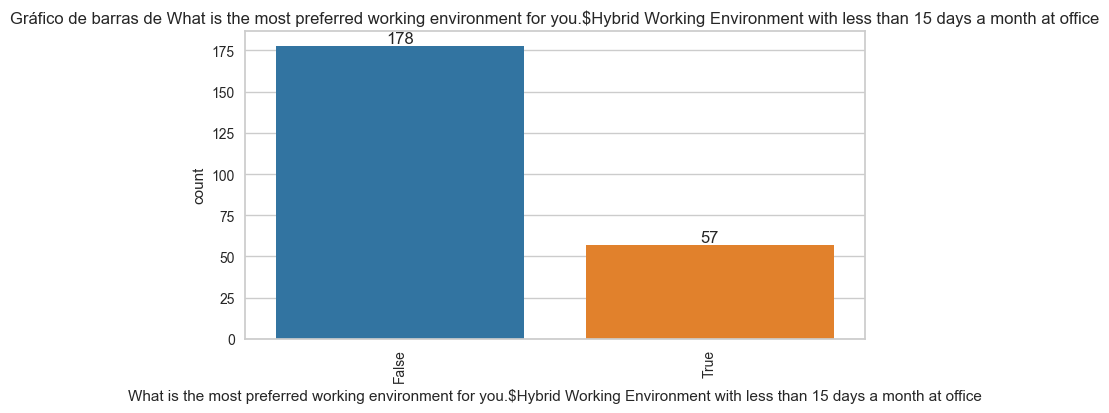

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


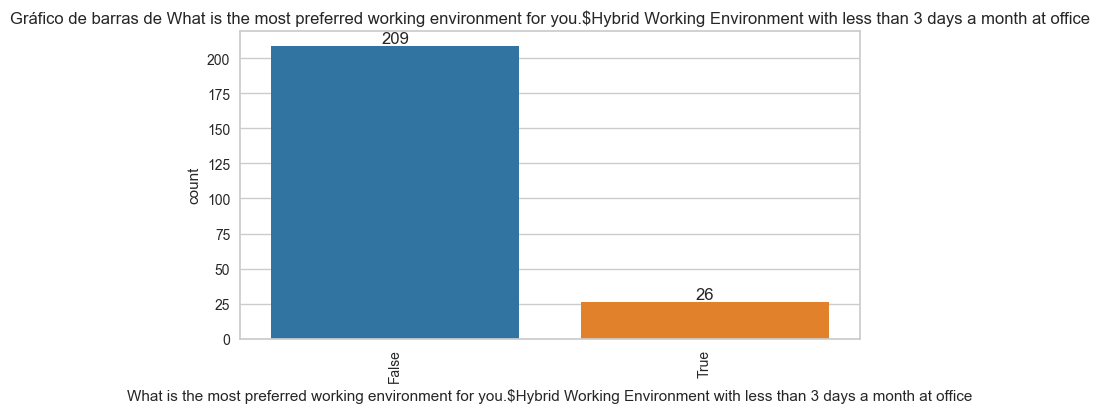

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


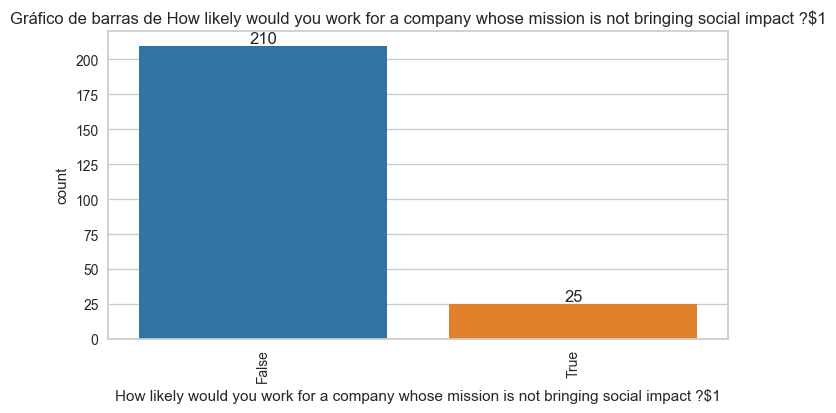

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


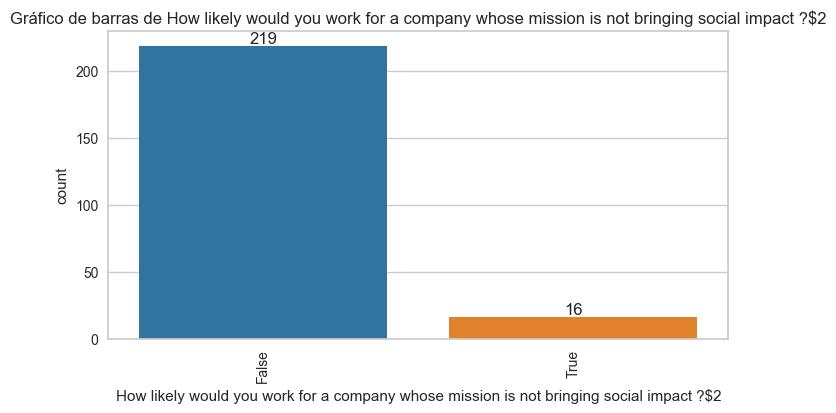

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


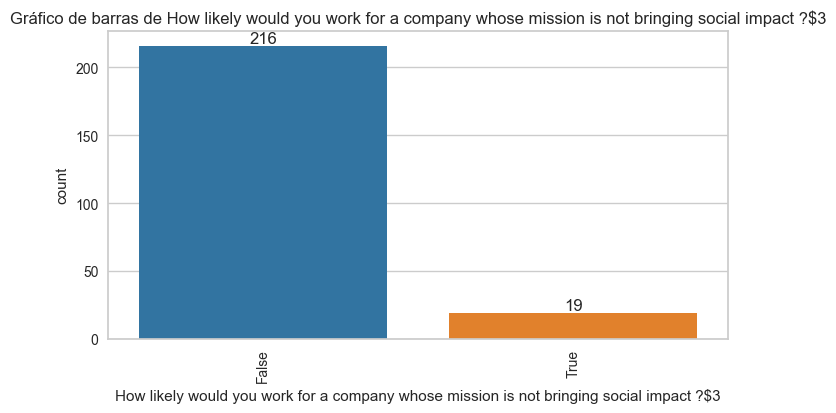

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


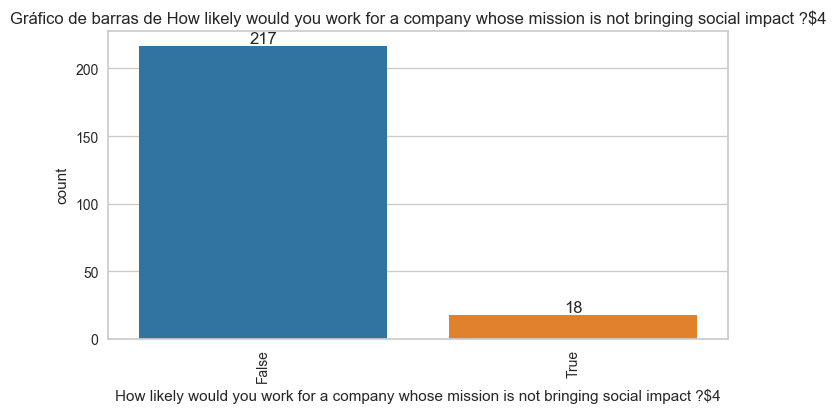

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


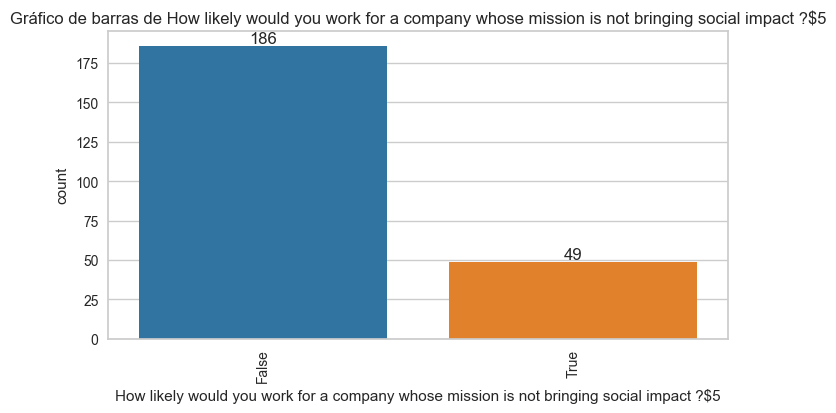

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


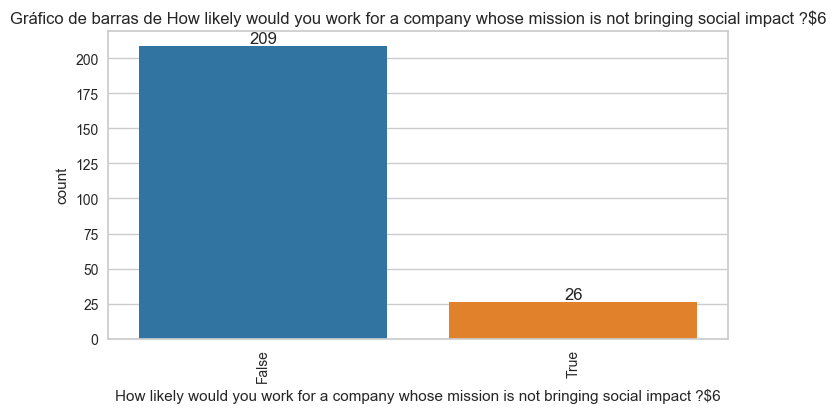

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


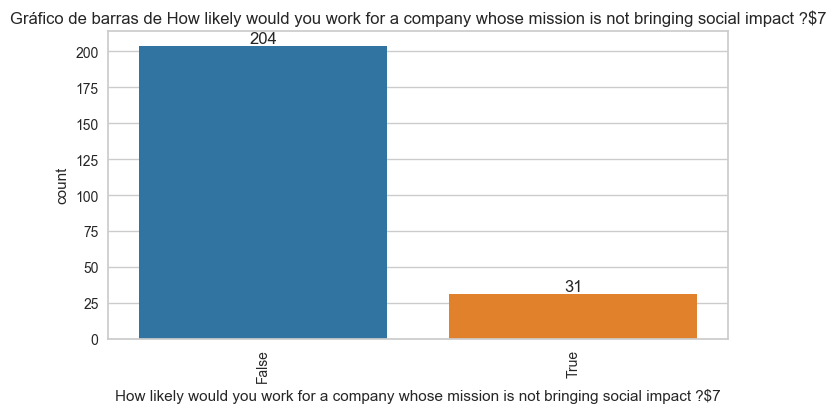

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


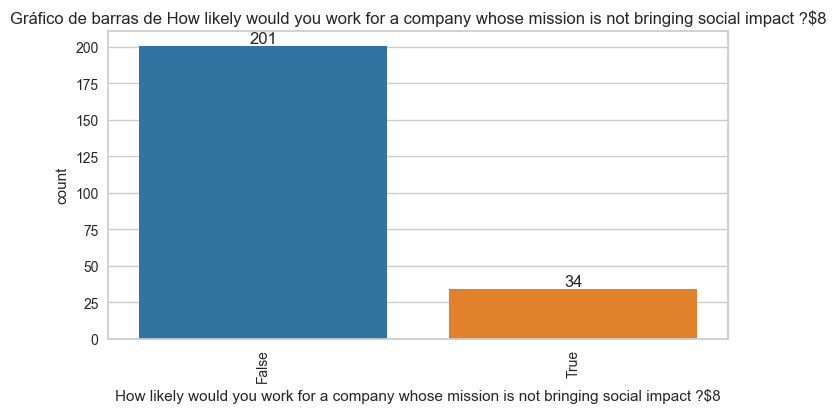

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


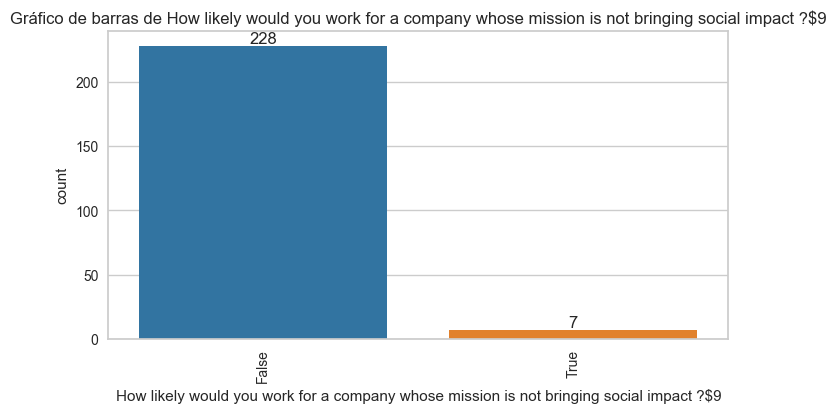

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


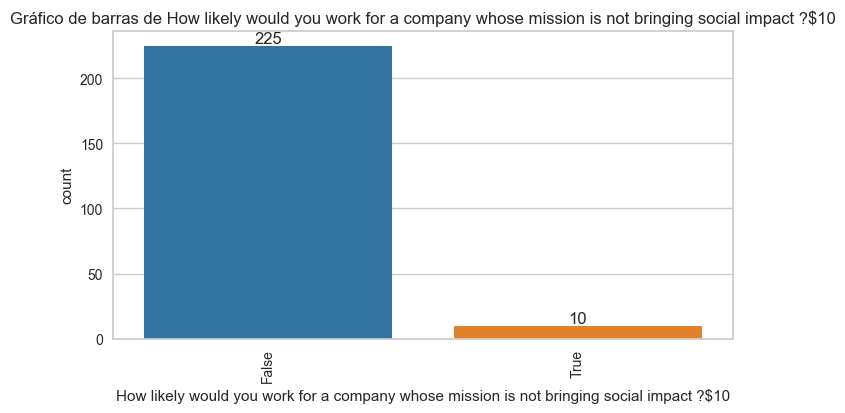

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


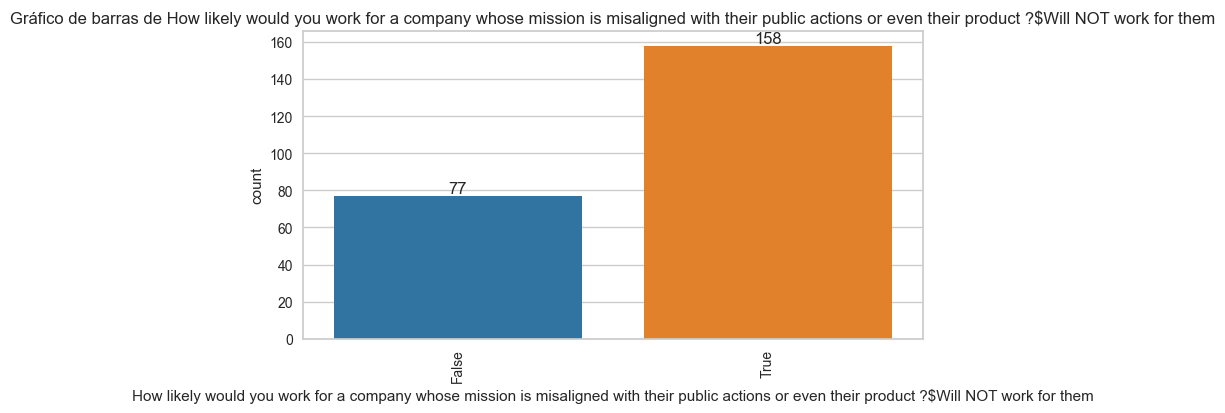

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


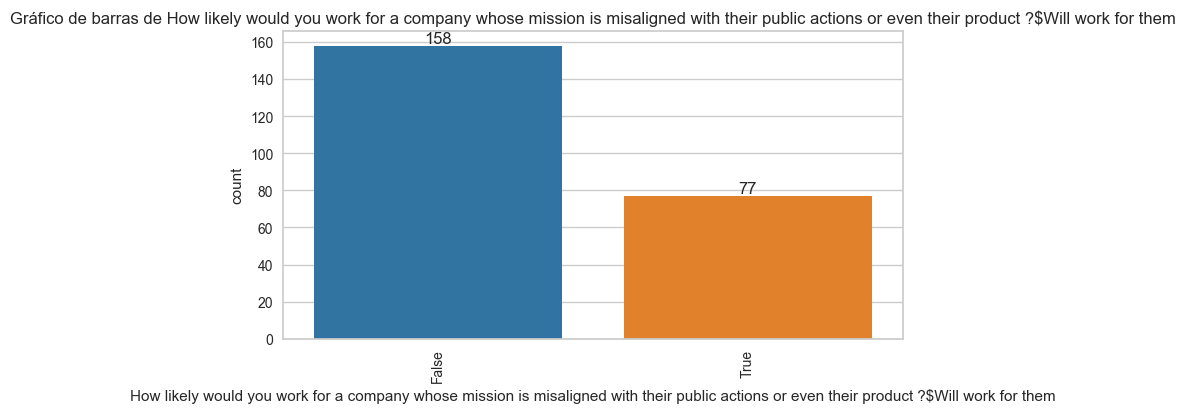

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


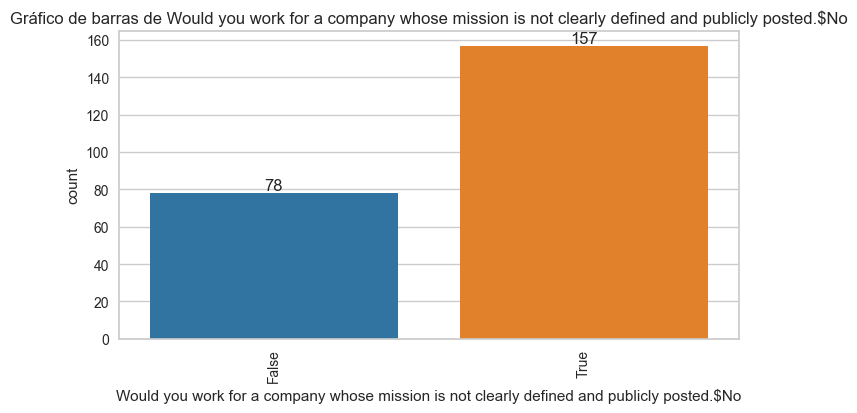

C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=columna, palette=colores)
C:\Users\jujor\AppData\Local\Temp\ipykernel_9820\665164741.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=columna, palette=colores)


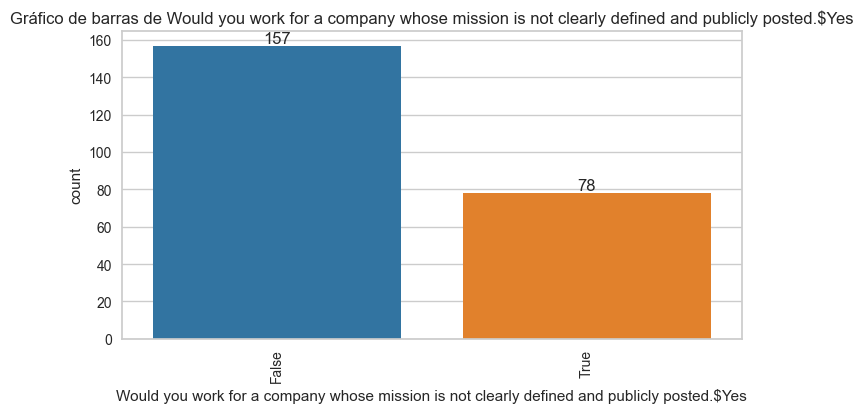

In [114]:
categoricas = df.select_dtypes(include=['object','bool'])
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for columna in categoricas.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=columna, palette=colores)
    plt.title(f'Gráfico de barras de {columna}')
    plt.xticks(rotation=90)
    if len(ax.patches) < 25:  # Imprimir valores solo si hay menos de 25 barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

In [115]:
df = df.astype(int)

In [116]:
df.columns

Index(['Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs',
       'Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company',
       'Which type of learning environment that you are most likely to work in ?$Self Paced Learning Portals',
       'Which type of learning environment that you are most likely to work in ?$Learning by observing others',
       'Which of the below careers looks close to your Aspirational job ?$Business Operations in any organization',
       'Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software',
       'Which of the below careers looks close to your Aspirational job ?$Become a content Creator in some platform',
       'Which of the below careers looks close to your Aspirational job ?$Manage and drive End-to-End Projects or Products',
       'Which of the below careers looks cl

In [117]:
X = df.drop('Would you work for a company whose mission is not clearly defined and publicly posted.$No', axis = 1)
y = df['Would you work for a company whose mission is not clearly defined and publicly posted.$No']

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [119]:
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [120]:
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [121]:
def evaluate_model(cv, model, X, y):
	# Evaluamos el modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# Devolvemos los resultados
	return mean(scores)

In [122]:
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Obtenemos la lista de modelos a considerar
models = get_models()
# Obtenemos los resultados
ideal_results, cv_results = list(), list()
# Evaluamos cada modelo
for model in models:
  # Evaluamos el modelo usado para cada condición de prueba
	cv_mean = evaluate_model(cv, model, X_train, y_train)
	ideal_mean = evaluate_model(ideal_cv, model, X_train, y_train)
	# Revisamos resultados no válidos
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# Guardamos resultados
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# Imprimimos el progreso de nuestra evaluación
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

>LogisticRegression: ideal=1.000, cv=1.000
>RidgeClassifier: ideal=1.000, cv=1.000
>SGDClassifier: ideal=0.984, cv=0.984
>PassiveAggressiveClassifier: ideal=1.000, cv=1.000
>KNeighborsClassifier: ideal=0.862, cv=0.856
>DecisionTreeClassifier: ideal=1.000, cv=1.000
>ExtraTreeClassifier: ideal=0.872, cv=0.835
>LinearSVC: ideal=1.000, cv=1.000
>SVC: ideal=1.000, cv=0.994
>GaussianNB: ideal=0.989, cv=0.989
>AdaBoostClassifier: ideal=1.000, cv=1.000
>BaggingClassifier: ideal=1.000, cv=1.000
>RandomForestClassifier: ideal=1.000, cv=1.000
>ExtraTreesClassifier: ideal=1.000, cv=1.000
>GaussianProcessClassifier: ideal=0.894, cv=0.877
>GradientBoostingClassifier: ideal=1.000, cv=1.000
>LinearDiscriminantAnalysis: ideal=0.777, cv=0.776
>QuadraticDiscriminantAnalysis: ideal=0.777, cv=0.973


In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)

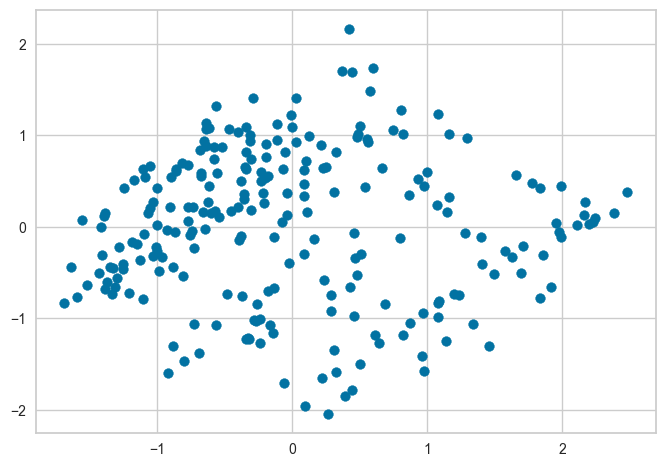

In [124]:
df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.show()

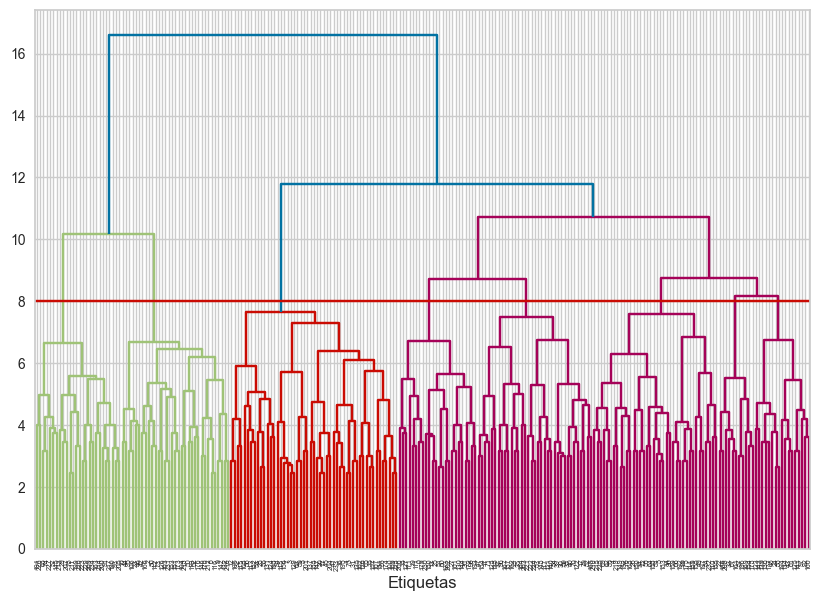

In [125]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
selected_data = df
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 8, color = 'r', linestyle = '-')
plt.xlabel("Etiquetas", fontsize=12)
plt.show()

In [126]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = "ward")

In [127]:
from sklearn import metrics
labels = hc.fit_predict(df)

In [128]:
Silueta = metrics.silhouette_score(df, labels)
Calinski_Harabasz = metrics.calinski_harabasz_score(df, labels)
Davies_Bouldin = metrics.davies_bouldin_score(df, labels)

In [129]:
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.030580403593518955
Score indice Calinski-Harabasz :  8.809570207033929
Score indice Davies-Bouldin:  3.844200236004892


In [130]:
for i in range(2,21):
  hc = AgglomerativeClustering(n_clusters = i, linkage = "ward")
  labels = hc.fit_predict(df)
  Silueta = metrics.silhouette_score(df, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df, labels)
  print(f'k = {i}; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

k = 2; silueta = 0.06559104243826377, Calinski-Harabasz = 14.278815387246377, Davies-Bouldin = 3.477708491617887
k = 3; silueta = 0.029053260596411327, Calinski-Harabasz = 11.04627163212139, Davies-Bouldin = 4.008720690116559
k = 4; silueta = 0.032210826561589474, Calinski-Harabasz = 9.624300788634246, Davies-Bouldin = 4.067055455764873
k = 5; silueta = 0.030580403593518955, Calinski-Harabasz = 8.809570207033929, Davies-Bouldin = 3.844200236004892


k = 6; silueta = 0.03221055835697636, Calinski-Harabasz = 8.015592506354409, Davies-Bouldin = 3.607319926590817
k = 7; silueta = 0.0335024725474553, Calinski-Harabasz = 7.501620176518456, Davies-Bouldin = 3.5426871977258982
k = 8; silueta = 0.03376050074736292, Calinski-Harabasz = 7.065247464986353, Davies-Bouldin = 3.315734995886527
k = 9; silueta = 0.031371311903749866, Calinski-Harabasz = 6.677911986701952, Davies-Bouldin = 3.253891182843526
k = 10; silueta = 0.032636231490126115, Calinski-Harabasz = 6.379728899415856, Davies-Bouldin = 3.211307806371997
k = 11; silueta = 0.03324164732646334, Calinski-Harabasz = 6.137978178918, Davies-Bouldin = 3.1574774978870908
k = 12; silueta = 0.02903930428328381, Calinski-Harabasz = 5.926991930955383, Davies-Bouldin = 3.0571972925318587
k = 13; silueta = 0.02550493356173308, Calinski-Harabasz = 5.717429715240024, Davies-Bouldin = 2.9485151530314884
k = 14; silueta = 0.02785346548173184, Calinski-Harabasz = 5.536906534072744, Davies-Bouldin = 2.8

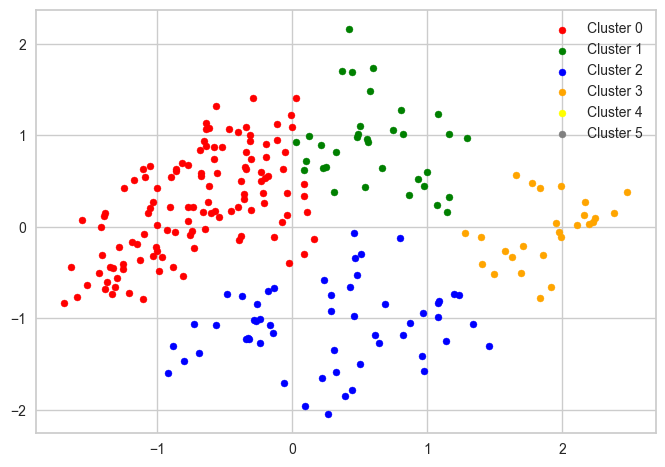

In [134]:
hc = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
y_hc = hc.fit_predict(df1)

plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.scatter(df1[y_hc == 4, 0], df1[y_hc == 4, 1], s = 100, marker= '.', c = "yellow", label = "Cluster 4")
plt.scatter(df1[y_hc == 5, 0], df1[y_hc == 5, 1], s = 100, marker= '.', c = "gray", label = "Cluster 5")

plt.legend()
plt.show()

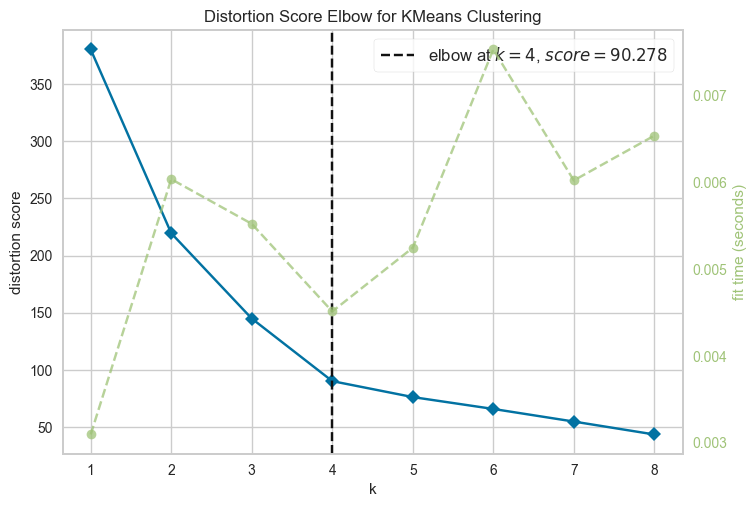

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Crear una instancia del visualizador KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 9))
# Ajustar los datos al visualizador
visualizer.fit(df1)
# Agregar títulos y etiquetas
visualizer.show()

In [136]:
for i in range(2,21):
  kmeans = KMeans(n_clusters = i)
  labels = kmeans.fit_predict(df1)
  Silueta = metrics.silhouette_score(df1, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df1, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df1, labels)
  print(f'k = {i}; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

k = 2; silueta = 0.42012685549006984, Calinski-Harabasz = 170.38955961264517, Davies-Bouldin = 1.0136570466833454
k = 3; silueta = 0.39951932330297246, Calinski-Harabasz = 204.4245175727764, Davies-Bouldin = 0.8332641061102254
k = 4; silueta = 0.42266594832983956, Calinski-Harabasz = 247.15384943506865, Davies-Bouldin = 0.7449190251421647
k = 5; silueta = 0.41116674533553854, Calinski-Harabasz = 227.85565530131015, Davies-Bouldin = 0.8518657977139293
k = 6; silueta = 0.3653706397433178, Calinski-Harabasz = 232.05161425438638, Davies-Bouldin = 0.8272306183352399
k = 7; silueta = 0.3689960303648039, Calinski-Harabasz = 241.41201575036212, Davies-Bouldin = 0.9192657601393369
k = 8; silueta = 0.3895893706056484, Calinski-Harabasz = 252.53961466112307, Davies-Bouldin = 0.7725672192965145
k = 9; silueta = 0.39195951540676666, Calinski-Harabasz = 251.22701391662756, Davies-Bouldin = 0.7769177627539438
k = 10; silueta = 0.35492559880573354, Calinski-Harabasz = 233.4090167472993, Davies-Bouldin

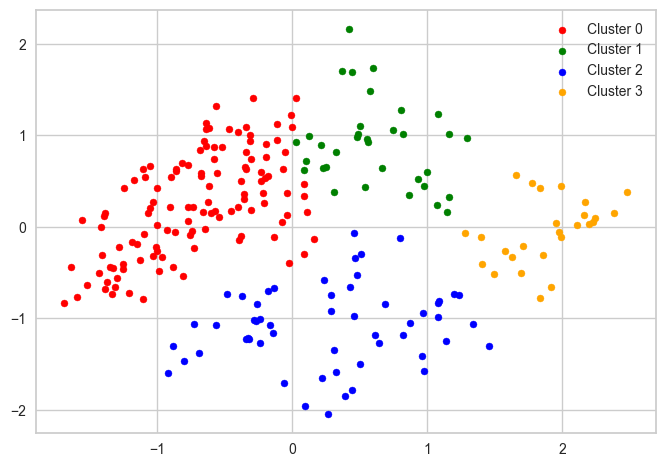

In [137]:
hc = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
y_hc = hc.fit_predict(df1)

plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")

plt.legend()
plt.show()

In [ ]:
df.head()

Which type of learning environment that you are most likely to work in ?$Instructor or Expert Learning Programs  \
0                                                  1                                                                 
1                                                  1                                                                 
2                                                  0                                                                 
3                                                  1                                                                 
4                                                  0                                                                 

   Which type of learning environment that you are most likely to work in ?$Trial and error by doing side projects within the company  \
0                                                  1                                                                                    
1                                                  0                                                                                    
2                                                  1                                                                                    
3                                                  1                                                                                    
4                                                  0                                                                                    

   Which type of learning environment that you are most likely to work in ?$Self Paced Learning Portals  \
0                                                  0                                                      
1                                                  1                                                      
2                                                  1                                                      
3                                                  0                                                      
4                                                  1                                                      

   Which type of learning environment that you are most likely to work in ?$Learning by observing others  \
0                                                  0                                                       
1                                                  0                                                       
2                                                  0                                                       
3                                                  0                                                       
4                                                  1                                                       

   Which of the below careers looks close to your Aspirational job ?$Business Operations in any organization  \
0                                                  1                                                           
1                                                  1                                                           
2                                                  0                                                           
3                                                  1                                                           
4                                                  1                                                           

   Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software  \
0                                                  0                                                       
1                                                  0                                                       
2                                                  1                                                       
3                                                  0                      

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df)
# Inicializar y ajustar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_normalizados)
# Obtener las asignaciones de cluster
clusters = kmeans.labels_
# Ahora puedes agregar 'clusters' a tu DataFrame original si lo deseas
df['Cluster'] = clusters

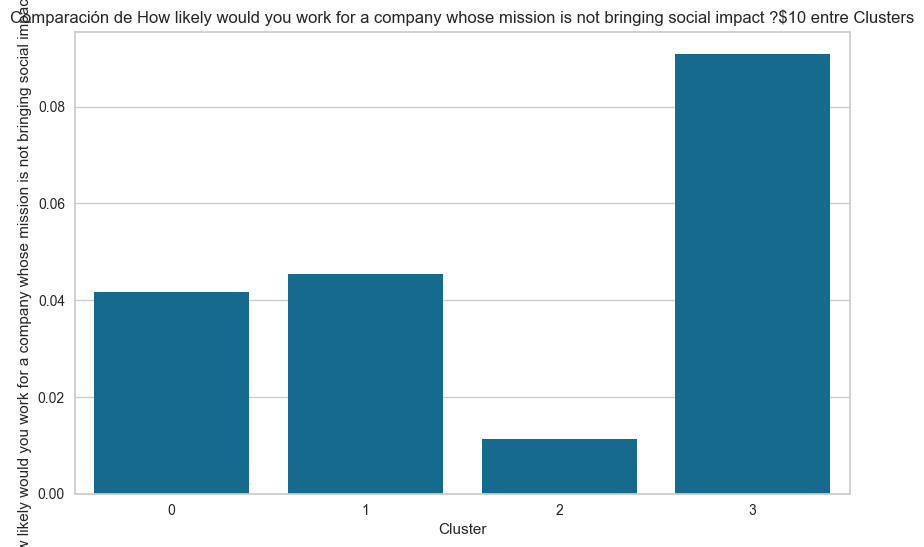

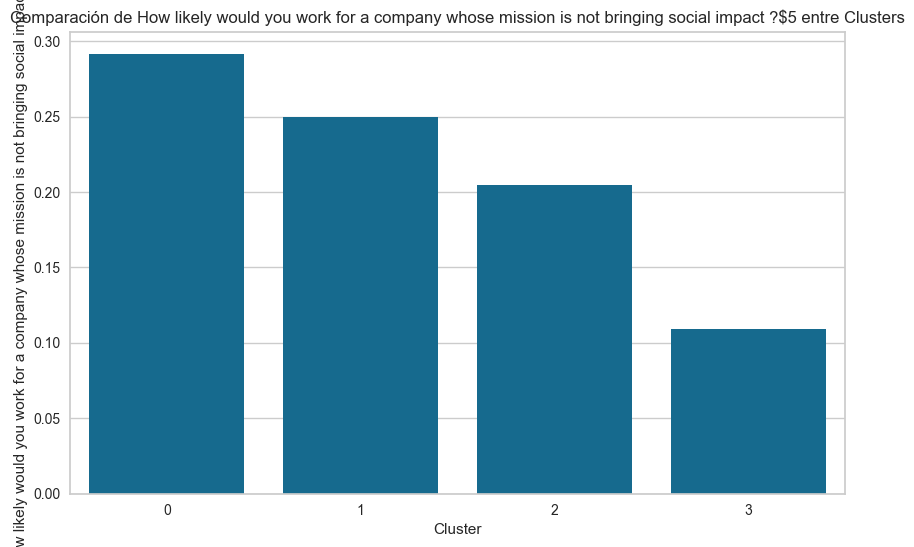

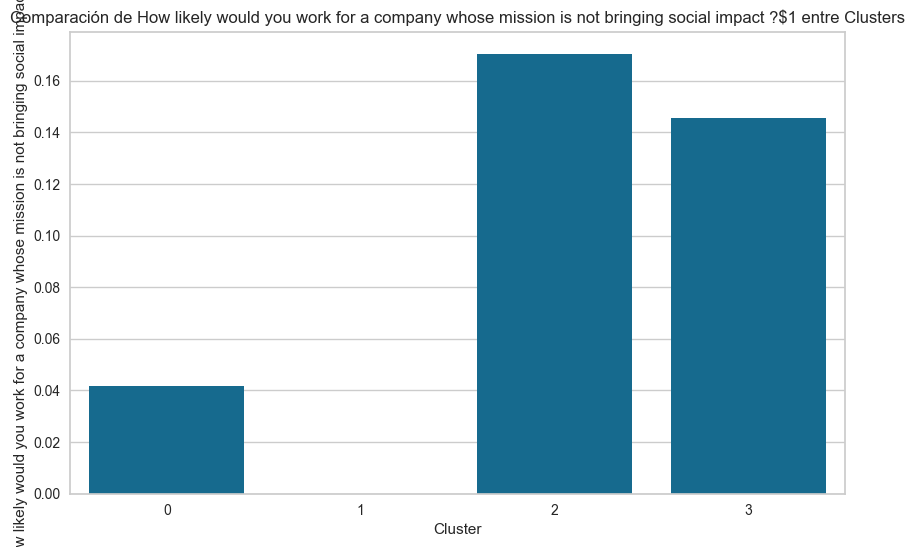

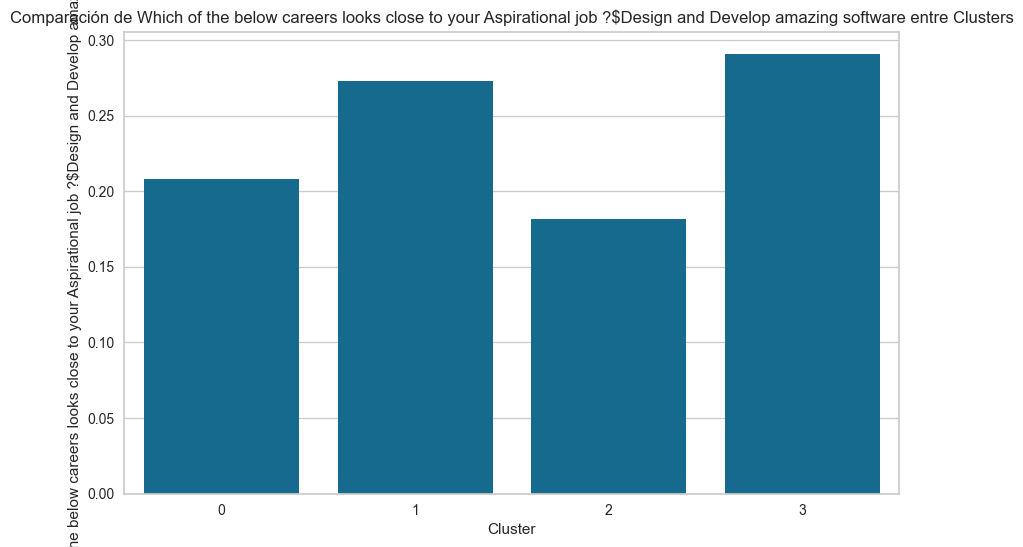

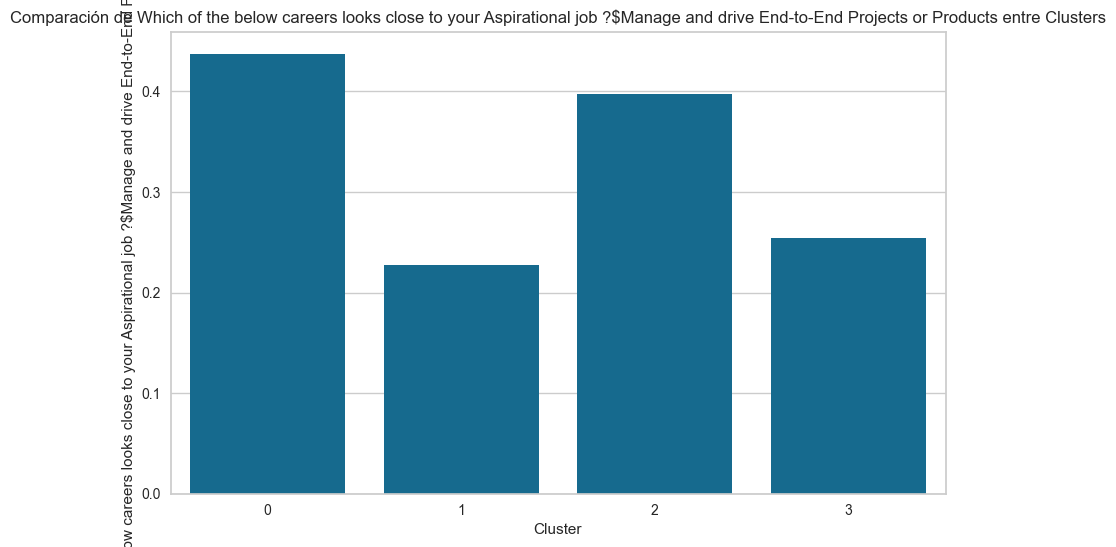

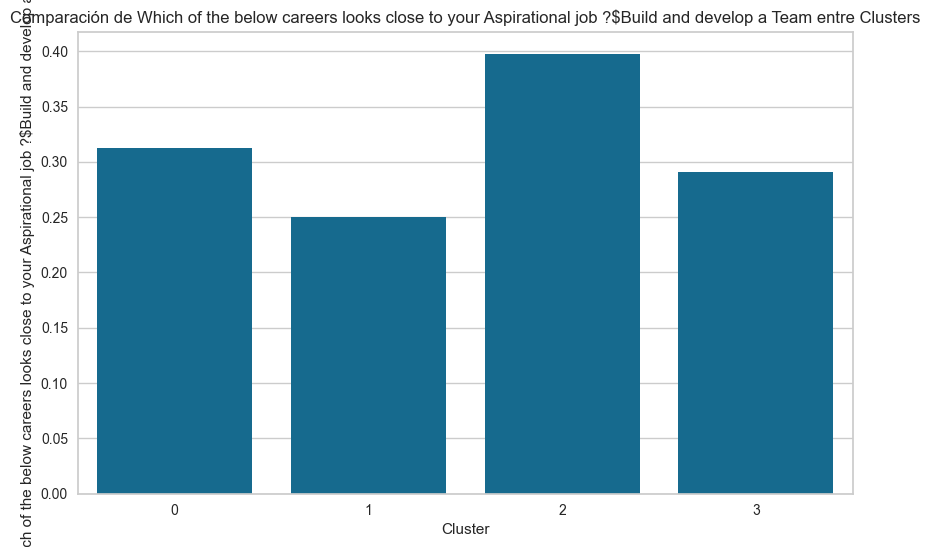

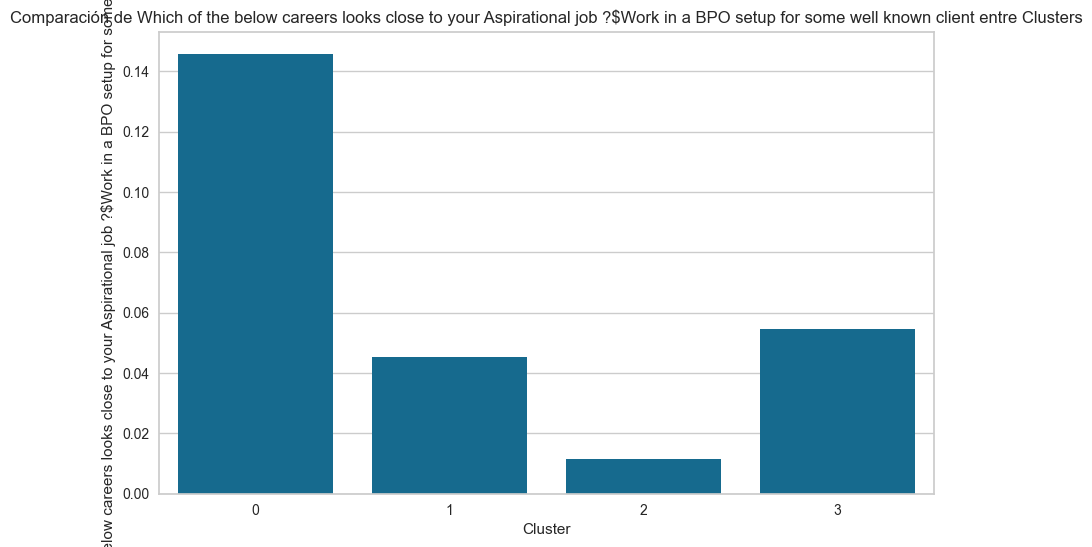

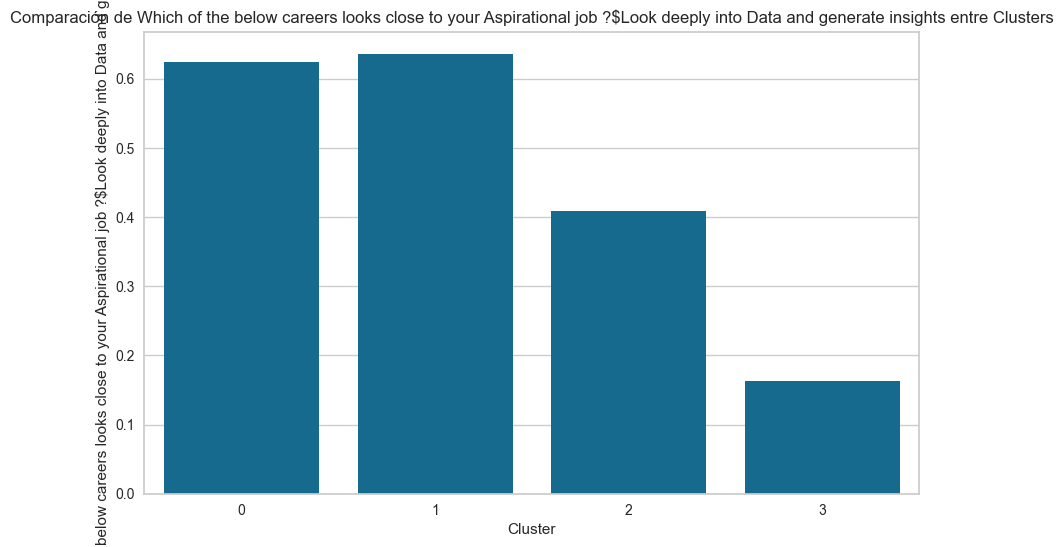

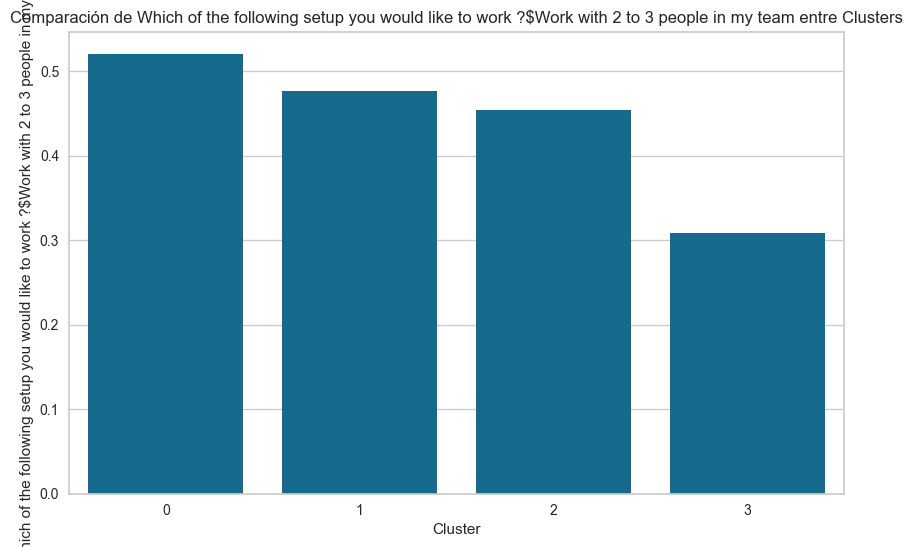

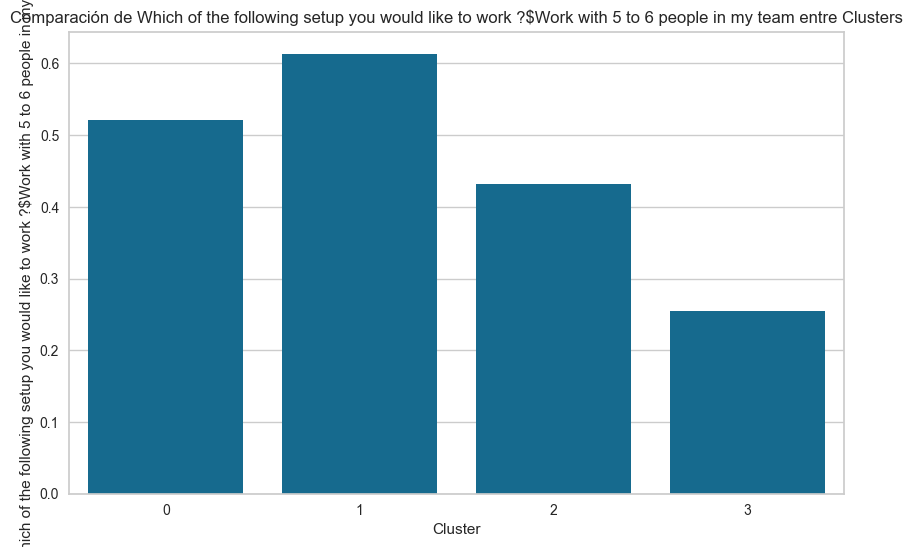

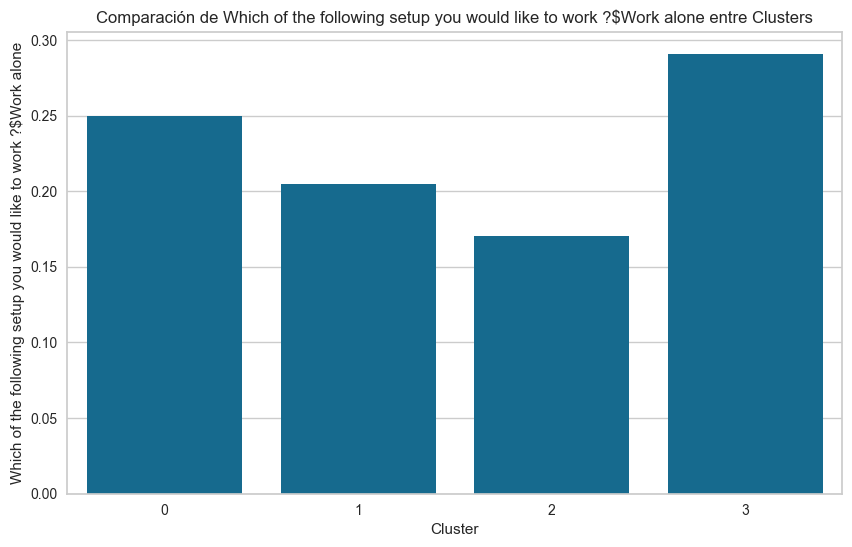

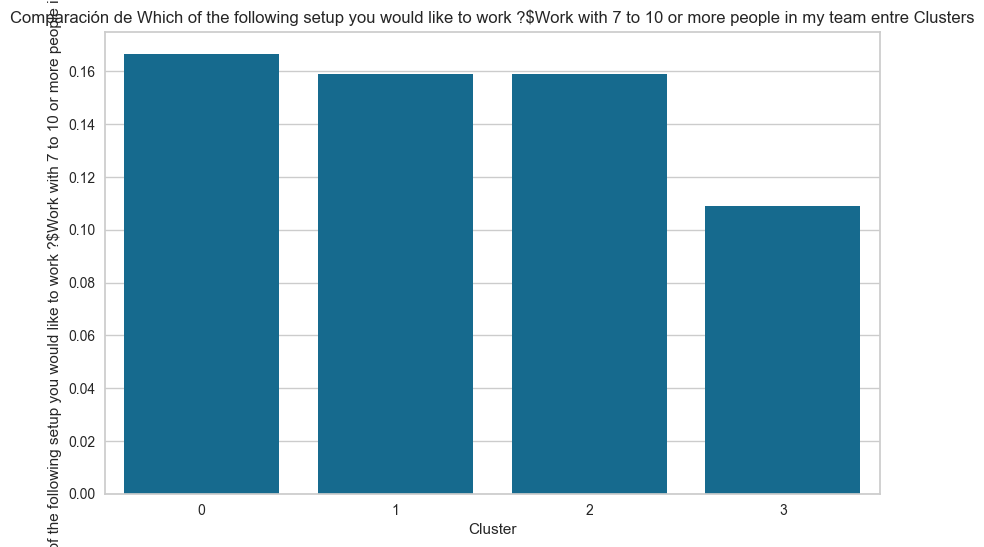

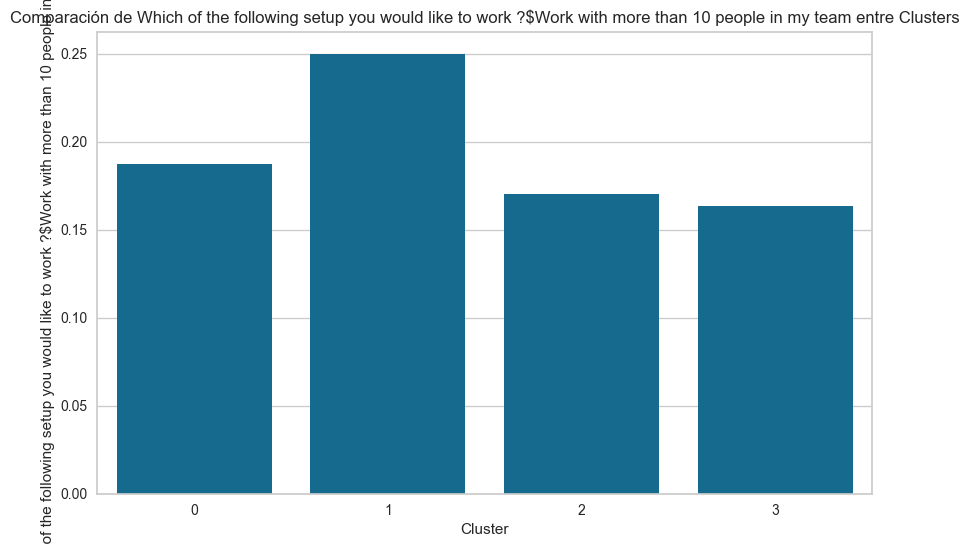

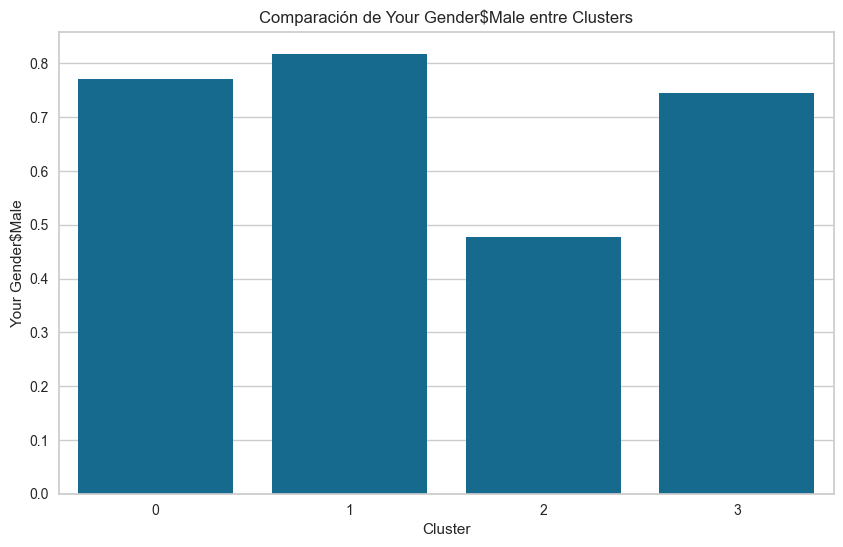

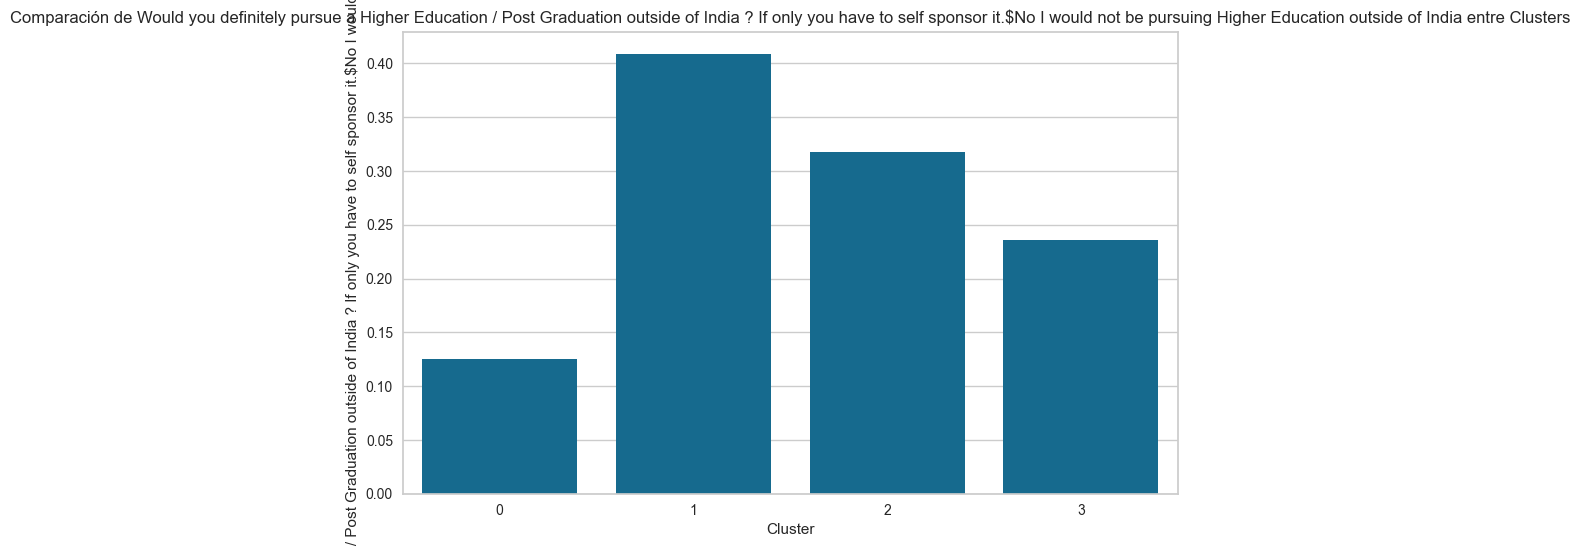

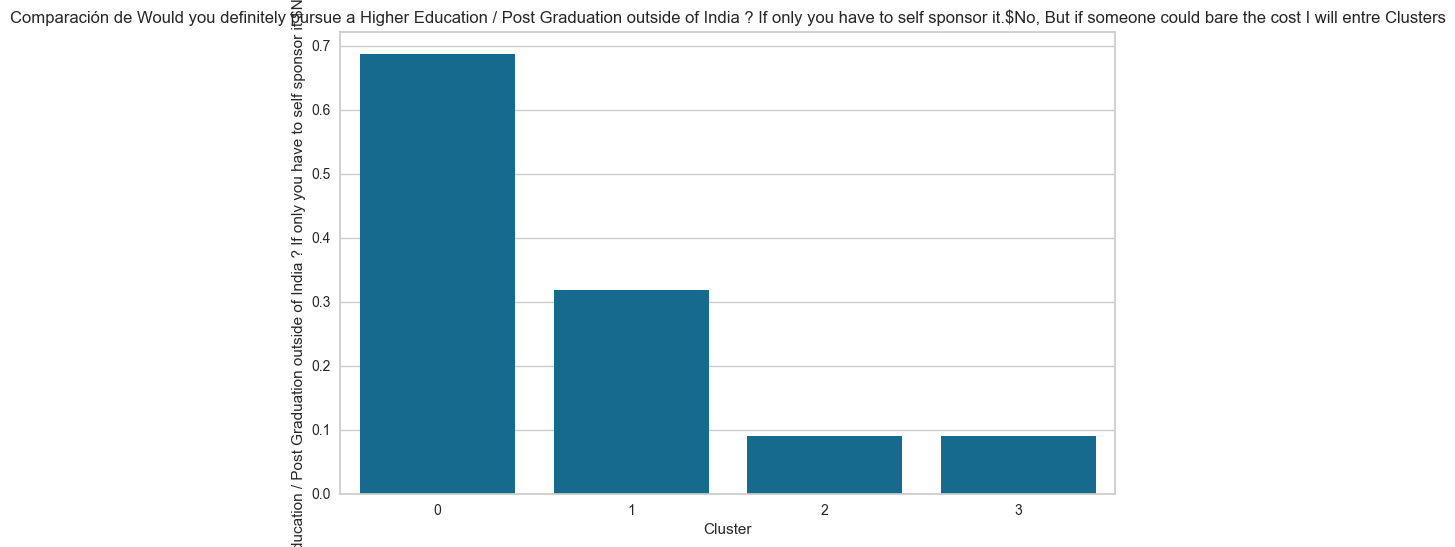

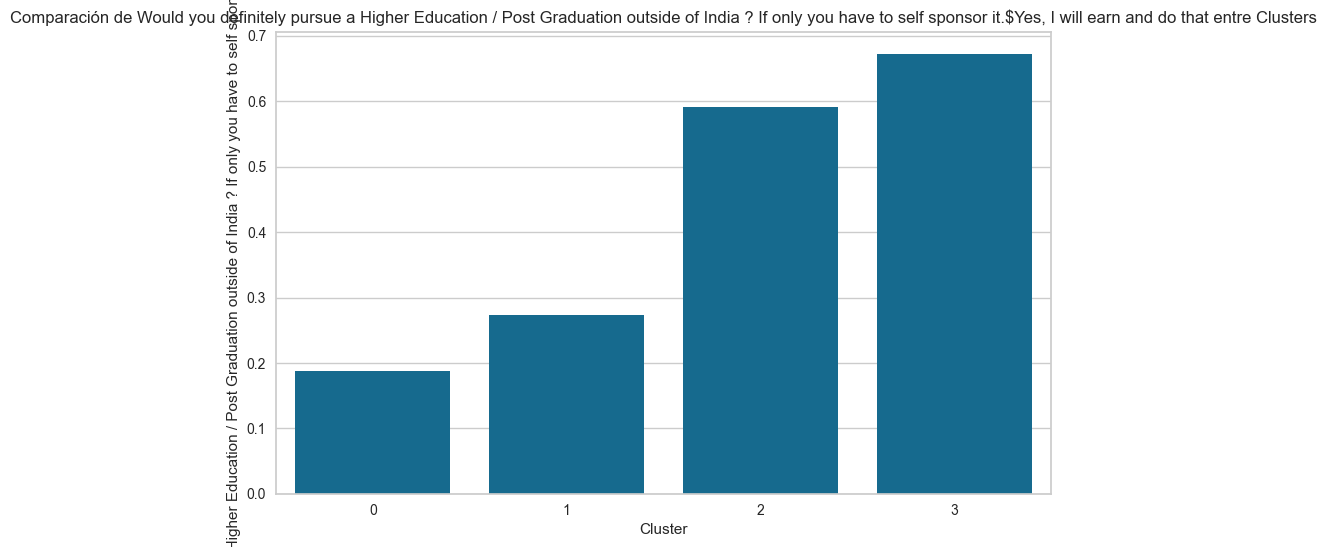

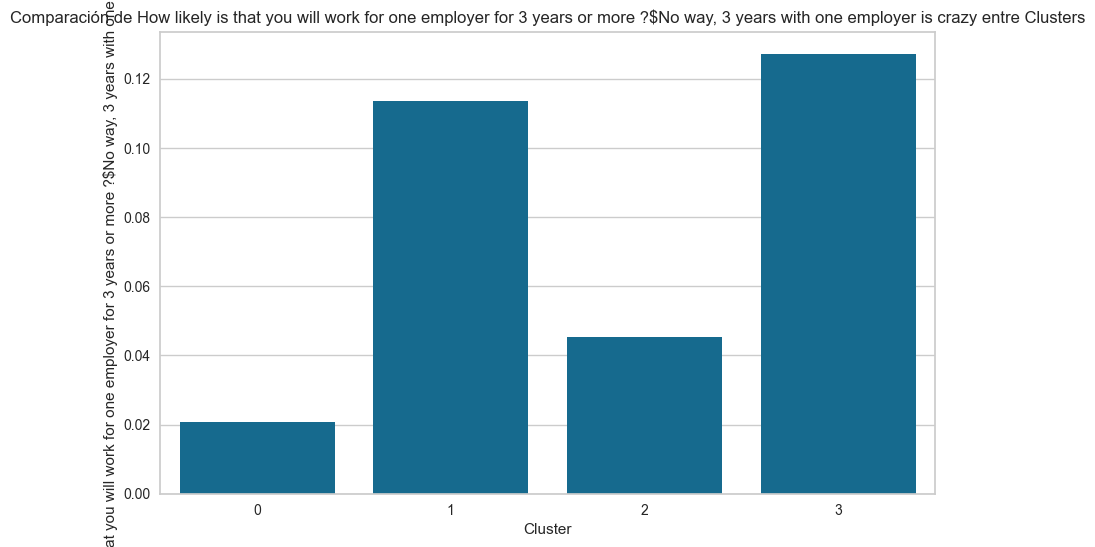

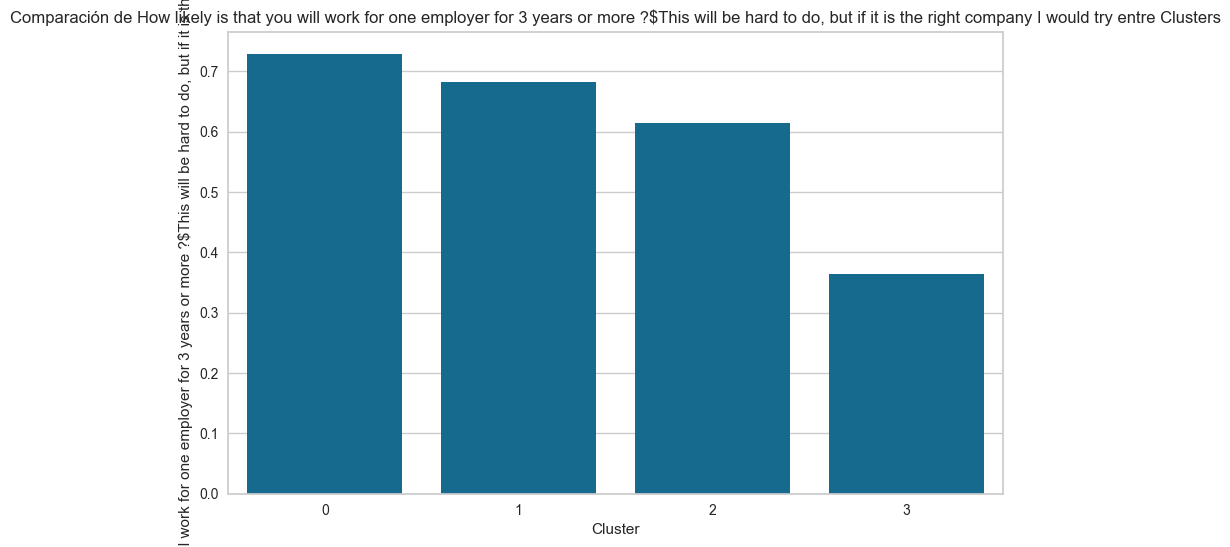

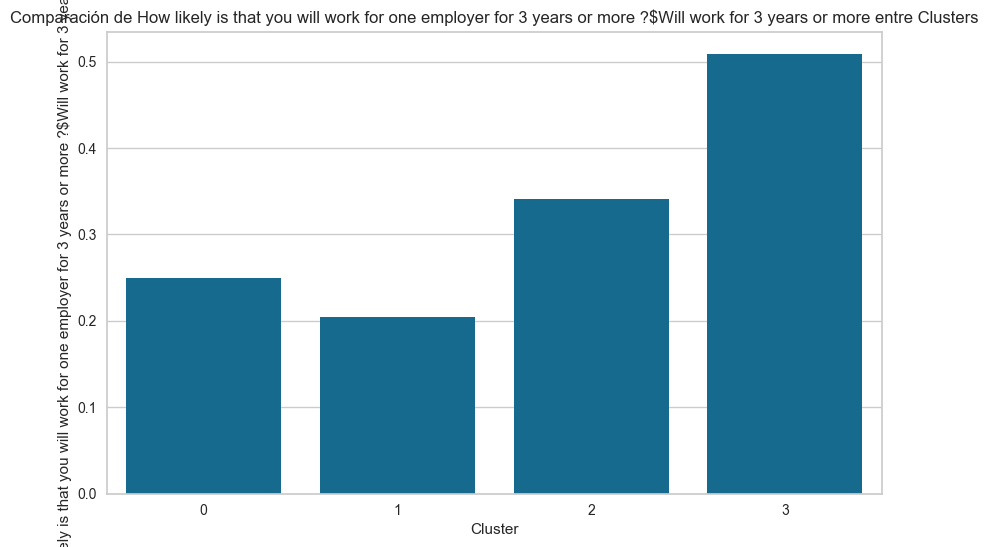

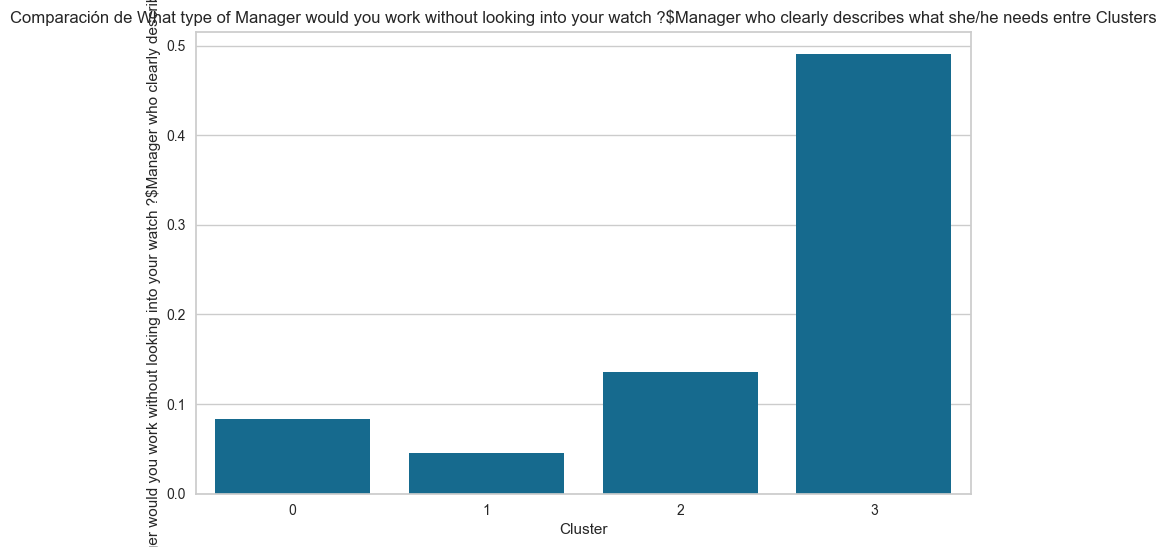

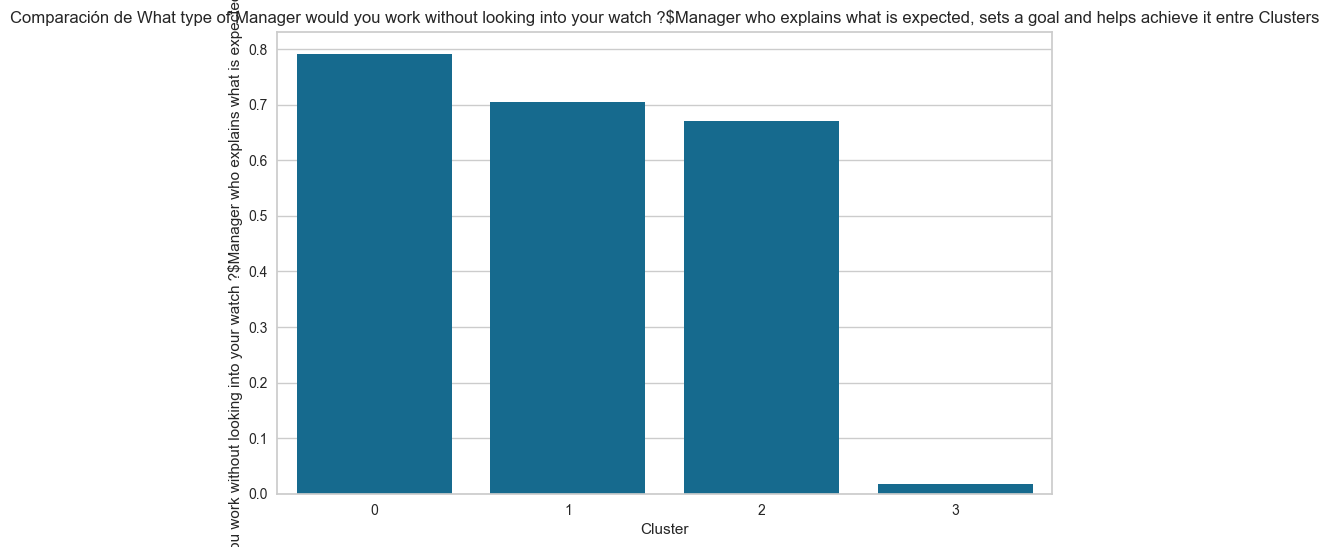

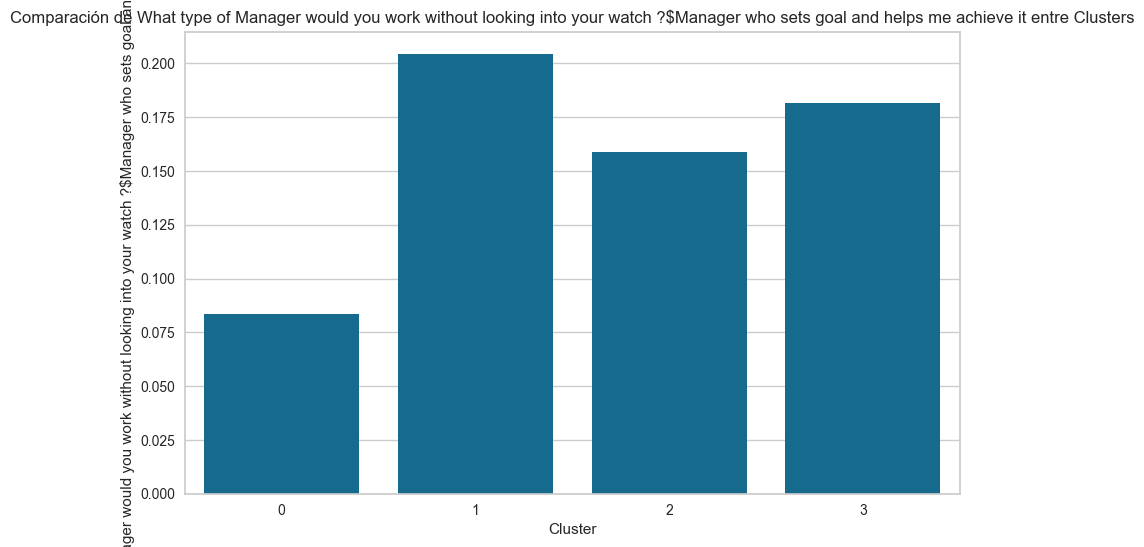

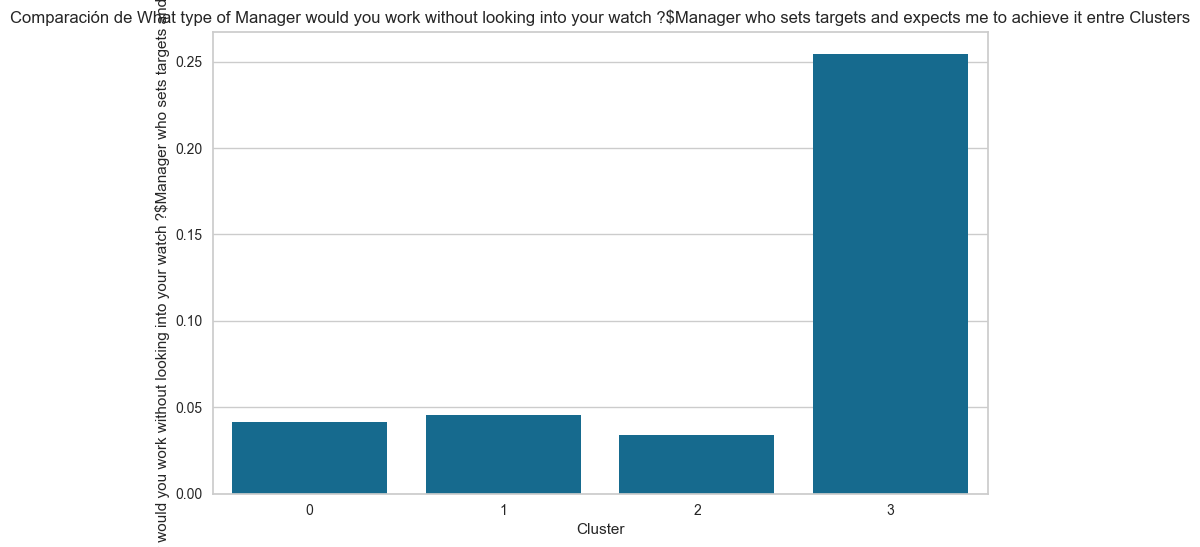

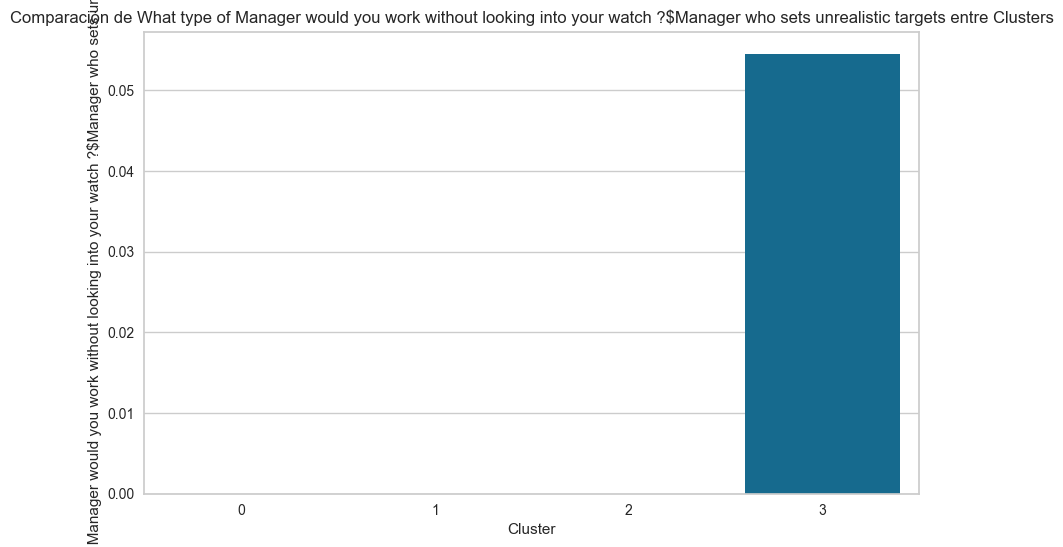

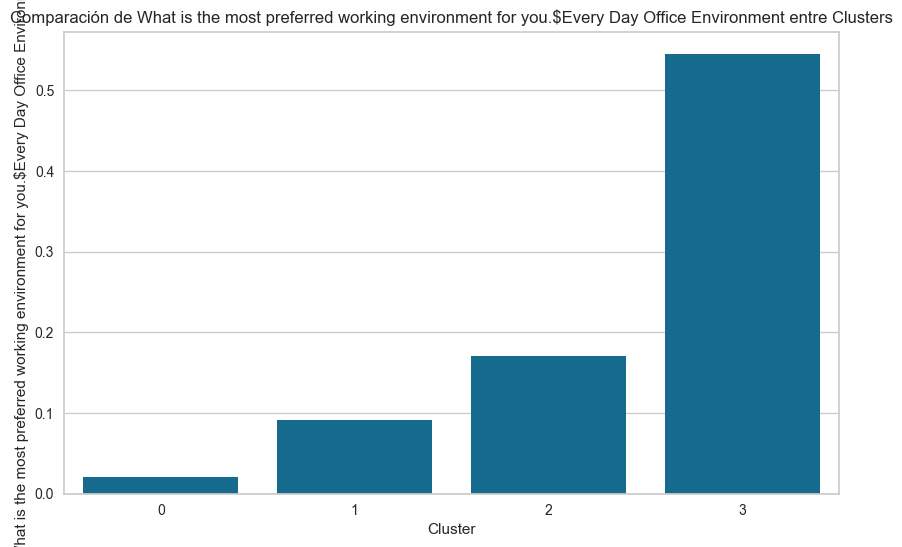

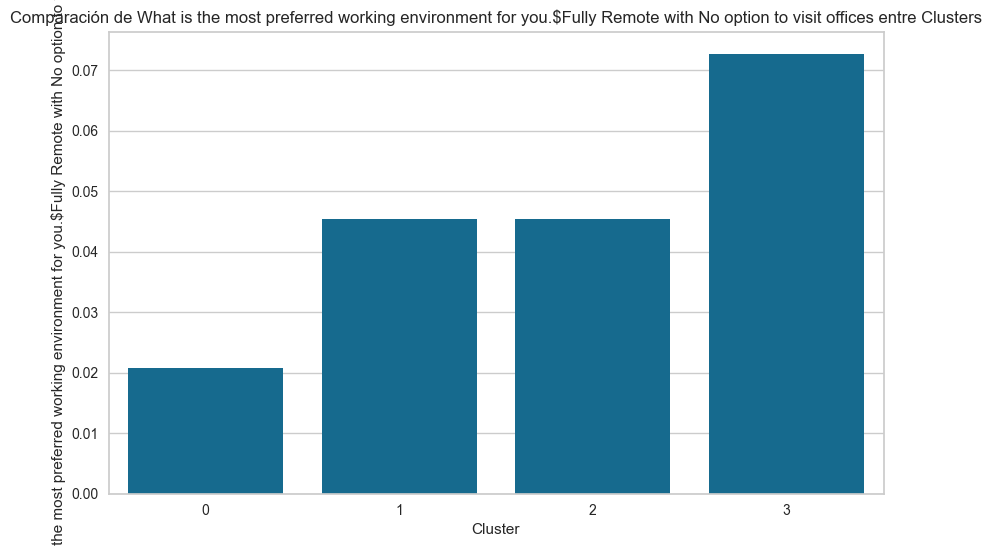

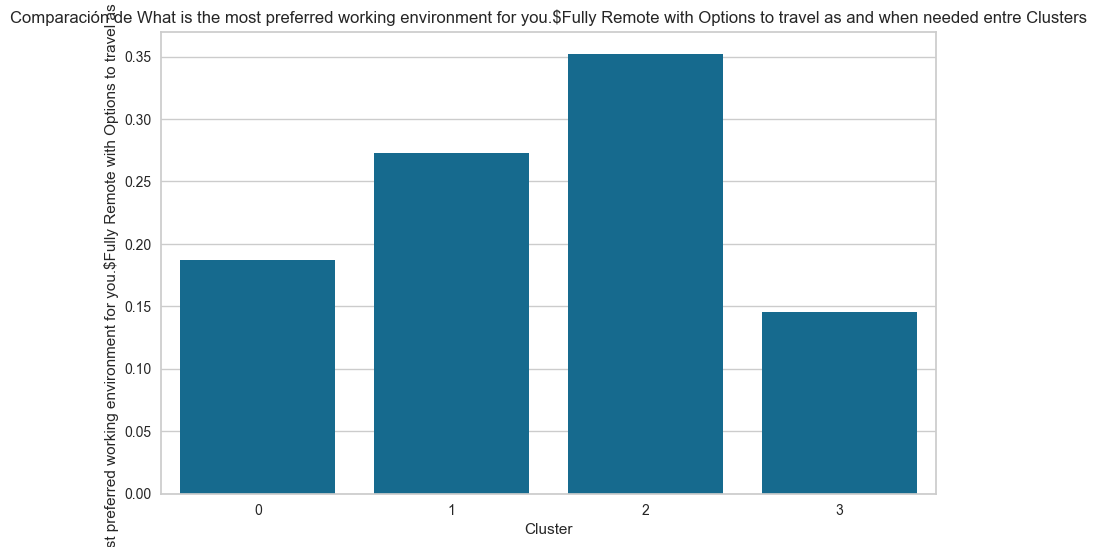

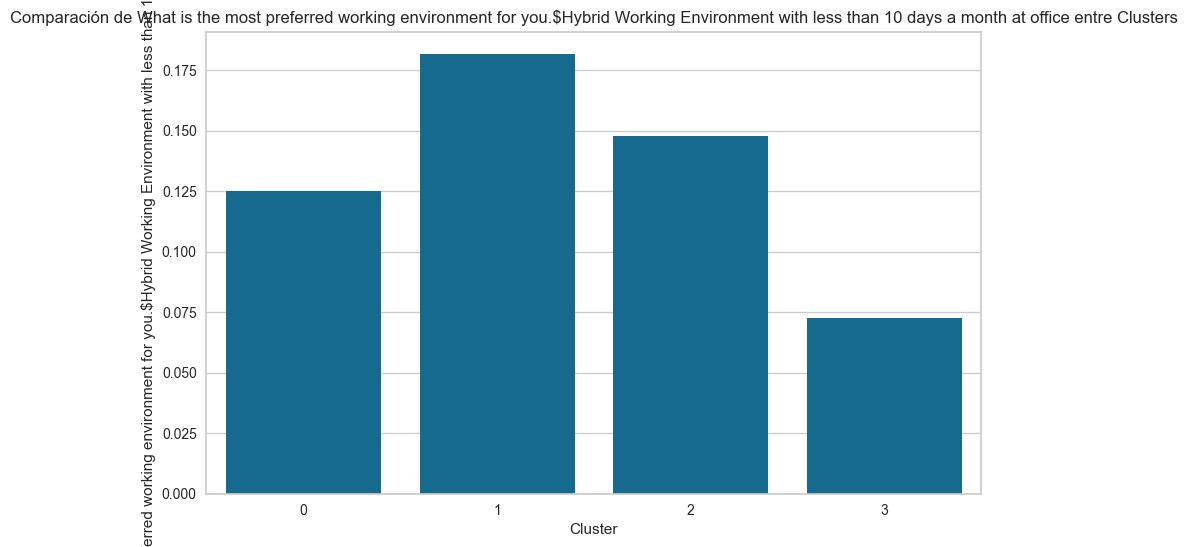

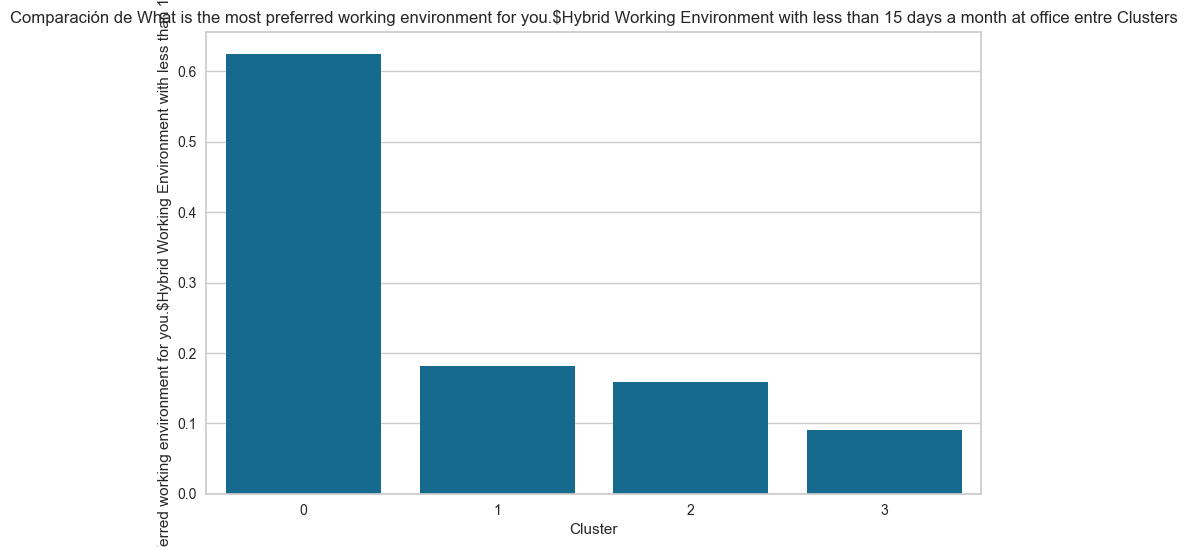

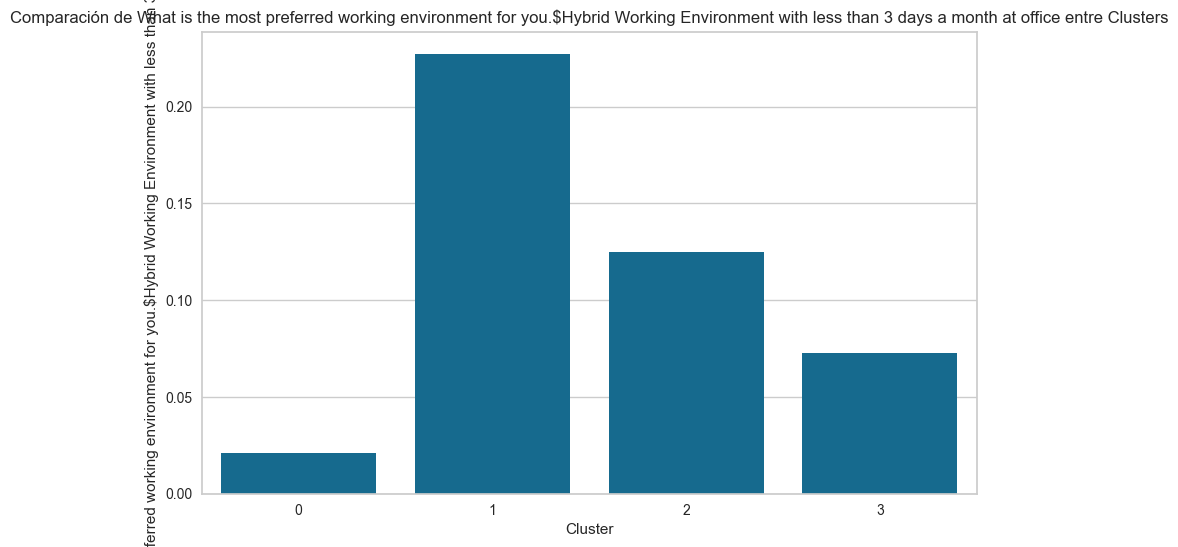

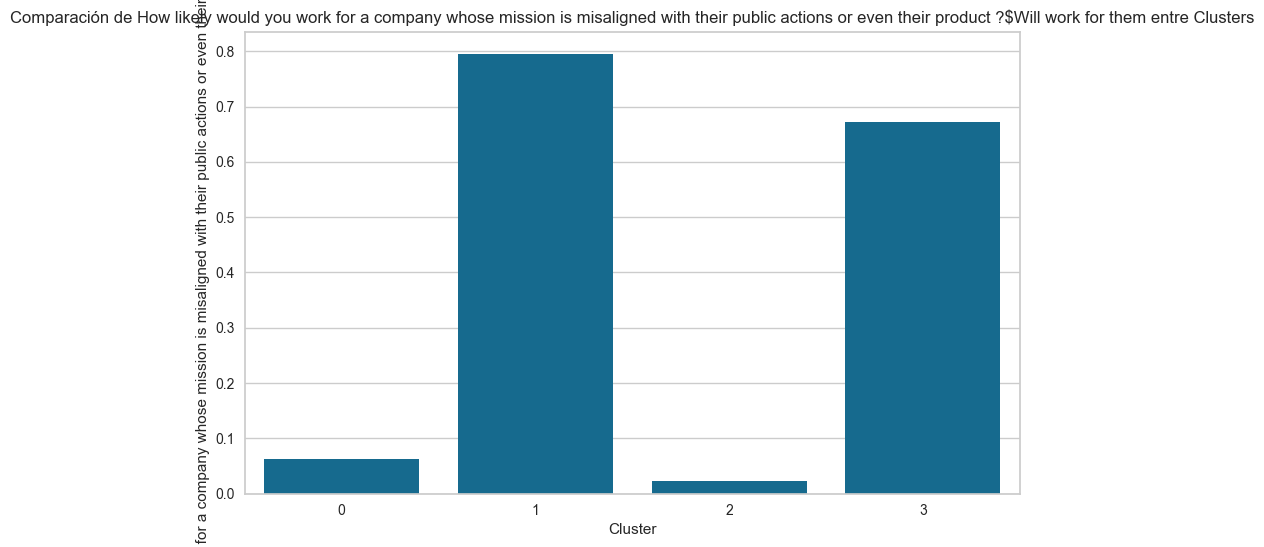

In [ ]:
def comparacion_medias(Variable):
    cluster_means = df.groupby('Cluster').mean()
    # Gráfico de barras para comparar las medias de una variable específica
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_means.index, y=Variable, data=cluster_means)
    plt.title('Comparación de '+Variable+' entre Clusters')
    plt.show()
    
variables = ['How likely would you work for a company whose mission is not bringing social impact ?$10',
'How likely would you work for a company whose mission is not bringing social impact ?$5',
'How likely would you work for a company whose mission is not bringing social impact ?$1',
'Which of the below careers looks close to your Aspirational job ?$Design and Develop amazing software',
'Which of the below careers looks close to your Aspirational job ?$Manage and drive End-to-End Projects or Products',
'Which of the below careers looks close to your Aspirational job ?$Build and develop a Team',
'Which of the below careers looks close to your Aspirational job ?$Work in a BPO setup for some well known client',
'Which of the below careers looks close to your Aspirational job ?$Look deeply into Data and generate insights',
'Which of the following setup you would like to work ?$Work with 2 to 3 people in my team',
'Which of the following setup you would like to work ?$Work with 5 to 6 people in my team',
'Which of the following setup you would like to work ?$Work alone',
'Which of the following setup you would like to work ?$Work with 7 to 10 or more people in my team',
'Which of the following setup you would like to work ?$Work with more than 10 people in my team',
'Your Gender$Male',
'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.$No I would not be pursuing Higher Education outside of India',
'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.$No, But if someone could bare the cost I will',
'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.$Yes, I will earn and do that',
'How likely is that you will work for one employer for 3 years or more ?$No way, 3 years with one employer is crazy',
'How likely is that you will work for one employer for 3 years or more ?$This will be hard to do, but if it is the right company I would try',
'How likely is that you will work for one employer for 3 years or more ?$Will work for 3 years or more',
'What type of Manager would you work without looking into your watch ?$Manager who clearly describes what she/he needs',
'What type of Manager would you work without looking into your watch ?$Manager who explains what is expected, sets a goal and helps achieve it',
'What type of Manager would you work without looking into your watch ?$Manager who sets goal and helps me achieve it',
'What type of Manager would you work without looking into your watch ?$Manager who sets targets and expects me to achieve it',
'What type of Manager would you work without looking into your watch ?$Manager who sets unrealistic targets',
'What is the most preferred working environment for you.$Every Day Office Environment',
'What is the most preferred working environment for you.$Fully Remote with No option to visit offices',
'What is the most preferred working environment for you.$Fully Remote with Options to travel as and when needed',
'What is the most preferred working environment for you.$Hybrid Working Environment with less than 10 days a month at office',
'What is the most preferred working environment for you.$Hybrid Working Environment with less than 15 days a month at office',
'What is the most preferred working environment for you.$Hybrid Working Environment with less than 3 days a month at office',
'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?$Will work for them']

for i in variables:
    comparacion_medias(i)

In [ ]:
'''print("\nMatriz de Correlación:")
matriz_correlacion = df.corr()
plt.figure(figsize=(100, 80))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()'''

'print("\nMatriz de Correlación:")\nmatriz_correlacion = df.corr()\nplt.figure(figsize=(100, 80))\nsns.heatmap(matriz_correlacion, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=0.5)\nplt.title("Matriz de Correlación")\nplt.show()'

In [ ]:
'''numericas = df.select_dtypes(include=['int64', 'float64', 'int32'])
# Matriz de dispersión para explorar multicolinealidad visualmente
print("\nMatriz de Dispersión para Multicolinealidad Visual:")
sns.pairplot(df[numericas.columns], palette=colores)
plt.show()'''

'numericas = df.select_dtypes(include=[\'int64\', \'float64\', \'int32\'])\n# Matriz de dispersión para explorar multicolinealidad visualmente\nprint("\nMatriz de Dispersión para Multicolinealidad Visual:")\nsns.pairplot(df[numericas.columns], palette=colores)\nplt.show()'